# Klausur Data Science I  
### Klausur I im Sommersemester 2025

## Allgemeine Informationen

* Sie haben eine Woche Zeit, um die Prüfung abzuschließen. 

* Sie können alle Quellen frei verwenden (einschließlich ChatGPT oder ähnlicher Software).

* Sie sollten die folgenden Pakete verwenden: `numpy, pandas, scipy, scikit-learn/sklearn, matplotlib, seaborn, statsmodels` und die nativen Bibliotheken von Python. Diese reichen aus, um die Prüfung zu lösen. Wenn Sie andere Bibliotheken verwenden, begründen Sie deren Verwendung.

* Der Code muss ausreichend kommentiert sein, um verständlich zu sein. Schreiben Sie Funktionen, wenn Sie Code wiederverwenden. Befolgen Sie im Allgemeinen die Richtlinien aus der Vorlesung. Bei schlecht strukturiertem oder unverständlichem Code können Punkte abgezogen werden.

* Begründen Sie Entscheidungen bezüglich der Wahl von Plots, Hypothesentests usw. immer schriftlich und interpretieren Sie Ihre Ergebnisse.

* Es ist **nicht** erlaubt, Hilfe oder Rat von anderen Personen in irgendeiner Form einzuholen. 

* Bitte reichen Sie das vollständige Repository als `.zip`-Datei mit dem Namen `Nachname_Matrikelnummer.zip` bis zum 4. August 2025 um 00:00 Uhr auf StudIP im Ordner `Submission - Exam 1` ein.

* Fügen Sie der ZIP-Datei außerdem die unterschriebene Eigenständigkeitserklärung (`Eigenständigkeitserklärung.pdf`) bei. 

* Bei Fragen wenden Sie sich bitte rechtzeitig über Matrix an uns.

In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.signal import periodogram
from scipy.stats import zscore, mannwhitneyu
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.stats.multitest import multipletests
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler, FunctionTransformer
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree, export_text, DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## Aufgaben und Punkte:

<table>
  <thead>
    <tr>
      <th colspan="4" style="border-right: 1px solid gray;">Aufgabe 1 - Data Preprocessing</th>
      <th colspan="5" style="border-right: 1px solid gray;">Aufgabe 2 - Plotting</th>
      <th colspan="3" style="border-right: 1px solid gray;">Aufgabe 3 - Statistics</th>
      <th colspan="2">Aufgabe 4 - Machine Learning </th>
    </tr>
    <tr style="border-bottom: 1px solid gray;">
      <th>Aufgabe 1.1</th>
      <th>Aufgabe 1.2</th>
      <th>Aufgabe 1.3</th>
      <th style="border-right: 1px solid gray;">Aufgabe 1.4</th>
      <th>Aufgabe 2.1</th>
      <th>Aufgabe 2.2</th>
      <th>Aufgabe 2.3</th>
      <th>Aufgabe 2.4</th>
      <th style="border-right: 1px solid gray;">Aufgabe 2.5</th>
      <th>Aufgabe 3.1</th>
      <th>Aufgabe 3.2</th>
      <th style="border-right: 1px solid gray;">Aufgabe 3.3</th>
      <th>Aufgabe 4.1</th>
      <th>Aufgabe 4.2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2 Punkte</td>
      <td>11 Punkte</td>
      <td>4 Punkte</td>
      <td style="border-right: 1px solid gray;">2 Punkte</td>
      <td>2 Punkte</td>
      <td>14 Punkte</td>
      <td>2 Punkte</td>
      <td>4 Punkte</td>
      <td style="border-right: 1px solid gray;">2 Punkte</td>
      <td>6 Punkte</td>
      <td>4 Punkte</td>
      <td style="border-right: 1px solid gray;">7 Punkte</td>
      <td>15 Punkte</td>
      <td>25 Punkte</td>
    </tr>
    <tr>
      <td colspan="4" style="text-align: center; font-weight: bold;border-right: 1px solid gray;">19 Punkte</td>
      <td colspan="5" style="text-align: center; font-weight: bold;border-right: 1px solid gray;">24 Punkte</td>
      <td colspan="3" style="text-align: center; font-weight: bold;border-right: 1px solid gray;">17 Punkte</td>
      <td colspan="2" style="text-align: center; font-weight: bold;">40 Punkte</td>
    </tr>
  </tbody>
</table>


_____
## Aufgabe 0: Setup

Der Prüfungsordner enthält eine `Dockerfile`-Datei, in der alle erforderlichen Bibliotheken definiert sind, sowie eine `docker-compose.yml`-Datei. Die Dockerfile-Datei basiert auf dem Jupyter Server-Image. Verwenden Sie sie, um ein Docker-Image zu erstellen und anschließend einen Container aus diesem Image zu starten. Sobald der Container ausgeführt wird, melden Sie sich bei der Jupyter Server-Instanz an, um die Prüfung abzuschließen.

Alternativ können Sie den [GWDG Jupyter Cloud-Dienst](https://jupyter-cloud.gwdg.de/) mit dem GWDG-Default-Image oder dem Data Science Jupyter-Image verwenden.

Wichtig:
Wenn Sie sich für die Arbeit in der Jupyter Cloud entscheiden und den Einsatz von weiteren Paketen entscheiden, müssen alle zusätzlichen Pakete innerhalb des Notebooks selbst installiert werden (z. B. mithilfe einer Zelle mit `!pip install ...`). Dadurch wird sichergestellt, dass Ihre Umgebung während der Benotung reproduziert werden kann.

Code, der nicht im bereitgestellten Docker-Container oder in der Jupyter Cloud-Umgebung ausgeführt werden kann, wird als **nicht funktionsfähig** angesehen und entsprechend benotet.

___
## Aufgabe 1: Data Preprocessing (18 Punkte)

### Datenbeschreibung

In dieser Prüfung arbeiten wir mit einem [Datensatz](https://arxiv.org/abs/2404.18984) von sozialen Interaktionen und nutzergenerierten Inhalten von [Bluesky](https://bsky.social/about). Der ursprüngliche Datensatz umfasst die vollständige Posting-Historie von über 4 Millionen Nutzern – etwa 81 % aller registrierten Konten – mit insgesamt 235 Millionen Posts. Um die Daten für die Analyse besser handhabbar zu machen, haben wir sie vorab aggregiert und in kleinere, strukturierte Dateien zusammengefasst.

Social-Media-Datensätze enthalten häufig einen Sentiment-Score, einen numerischen Wert, der den emotionalen Ton von Textinhalten wie Beiträgen angibt (0: negativ, 1: neutral, 2: positiv). Da Sentiment-Scores in diesem Datensatz nur für englischsprachige Inhalte verfügbar sind, haben wir die Daten so gefiltert, dass nur englischsprachige Beiträge enthalten sind. Darüber hinaus haben wir die Nutzerinteraktionen auf diejenigen beschränkt, die sich ausschließlich auf diese gefilterten Beiträge beziehen.

Unser aggregierter Datensatz besteht aus drei Unterdatensätzen: Autoreninteraktionen, Nutzerinteraktionen und Nutzer-Post-Statistiken pro Tag.

**Autoreninteraktionen**
Enthält aggregierte Statistiken darüber, wie oft Posts einzelner Autoren verschiedene Arten von Interaktionen erhalten haben. Jede Zeile entspricht einem eindeutigen Autor, der durch eine numerische Benutzer-ID identifiziert wird.
- `author`: Eine eindeutige Kennung für jeden Nutzer.
- `replied_count`: Die Gesamtzahl der Antworten, die auf Beiträge des Autors eingegangen sind.
- `reposted_count`: Die Gesamtzahl der Reposts von Beiträgen des Autors durch andere.
- `quoted_count`: Die Anzahl der Zitate von Beiträgen des Autors in Beiträgen anderer Nutzer.

**Nutzerinteraktionen**
Fasst das Interaktionsverhalten einzelner Benutzer zusammen – wie oft sie sich mit Beiträgen anderer beschäftigt haben. Jede Zeile steht für einen eindeutigen Benutzer, der durch eine numerische Benutzer-ID identifiziert wird.
- `user_id`: Eine eindeutige Kennung für jeden Benutzer.
- `replied_count`: Die Gesamtzahl der Antworten, die der Benutzer auf andere Beiträge geschrieben hat.
- `reposted_count`: Die Gesamtzahl der Beiträge, die der Benutzer erneut gepostet hat.
- `quoted_count`: Die Anzahl der Male, die der Benutzer Beiträge anderer Benutzer in seinen eigenen Beiträgen zitiert hat.

**Nutzer-Post-Statistiken pro Tag**
Liefert tägliche Statistiken zu benutzergenerierten Beiträgen. Jede Zeile steht für die Beitragstätigkeit eines einzelnen Benutzers an einem bestimmten Tag.
- `date`: Das Kalenderdatum, an dem die Beiträge verfasst wurden.
- `user_id`: Eine eindeutige Kennung für den Benutzer, der die Beiträge verfasst hat.
- `post_count`: Die Anzahl der Beiträge, die der Benutzer an diesem Tag verfasst hat.
- `mean_sentiment`: Der durchschnittliche Sentiment-Wert der Beiträge des Benutzers an diesem Tag, der den allgemeinen emotionalen Ton angibt (z. B. positiv, neutral oder negativ).

### Aufgabe 1.1. – Laden von Daten (2 Punkte)

Laden Sie die folgenden Datensätze in Pandas-Datenrahmen:
- `author_interaction_stats.csv.gz`
- `user_interaction_stats.csv.gz`
- `user_post_stats_per_day.csv.gz`

Stellen Sie sicher, dass die Spalte `date` in `user_post_stats_per_day` als Datum interpretiert wird – entweder während des Ladens oder durch anschließende Konvertierung.

In [64]:
#daten laden:
author_interaction_stats = pd.read_csv('data/author_interaction_stats.csv.gz', compression='gzip')
user_interaction_stats = pd.read_csv('data/user_interaction_stats.csv.gz', compression='gzip')
user_post_stats_per_day = pd.read_csv('data/user_post_stats_per_day.csv.gz', compression='gzip')

# date als datum interpretieren:
print("Datumstyp vor Konvertierung:", user_post_stats_per_day['date'].dtype)
user_post_stats_per_day['date'] = pd.to_datetime(user_post_stats_per_day['date'])
print("Datumstyp nach Konvertierung:", user_post_stats_per_day['date'].dtype)

#um zu ueperpruefen, ob die Struktur richtig aussieht:
print("\n author_interaction_stats: \n", author_interaction_stats)
print("\n user_interaction_stats: \n", user_interaction_stats)
print("\n user_post_stats_per_day: \n", user_post_stats_per_day)


Datumstyp vor Konvertierung: object
Datumstyp nach Konvertierung: datetime64[ns]

 author_interaction_stats: 
           author  replied_count  reposted_count  quoted_count
0          15109         195860            9397           873
1           1248         135219          116304         70391
2          90949         107807            2102          5816
3           4983          97109           71683         23029
4          34218          94790          105574         59459
...          ...            ...             ...           ...
1446164    40685              0               0             1
1446165  1976950              0               0             1
1446166  1594591              0               0             1
1446167   719203              0               0             1
1446168  1773043              0               0             1

[1446169 rows x 4 columns]

 user_interaction_stats: 
          user_id  replied_count  reposted_count  quoted_count
0              0           

### Aufgabe 1.2. – Aggregation (11 Punkte)

Zunächst interessieren wir uns für Trends über die Zeit. Aggregieren Sie dazu die Daten aus `user_post_stats_per_day` über alle Tage und geben Sie zusammenfassende Statistiken für jeden Tag an.
 - Gesamtanzahl der Posts pro Tag
 - Durchschnittliches Sentiment über alle Nutzer pro Tag
 - Durchschnittliches Sentiment über alle Posts pro Tag (Tipp: Verwenden Sie hierfür einen gewichteten Mittelwert)

Stellen Sie sicher, dass der resultierende DataFrame nach der Spalte `date` indiziert ist, wobei diese als korrektes `datetime`-Objekt gespeichert ist.

In [48]:
# Statistiken für jeden Tag zusamenfassen:
daily_stats = user_post_stats_per_day.groupby('date').agg(
    total_posts=('post_count', 'sum'),
    mean_sentiment_per_user=('mean_sentiment', 'mean')
)

# Funktion für den gewichteten mittelwert des sentiments:
def weighted_sentiment(group):
    return np.average(group['mean_sentiment'], weights=group['post_count'])

weighted_post_sent = user_post_stats_per_day.groupby('date').apply(weighted_sentiment)
weighted_post_sent.name = 'mean_post_sentiment'

daily_stats = daily_stats.join(weighted_post_sent)

# sicherstellen, dass der df nach 'date' indiziert ist:
daily_stats.index = pd.to_datetime(daily_stats.index)
daily_stats = daily_stats.sort_index()

#ueberpruefen der strukturen:
print(daily_stats.index.dtype) # Quelle = ChatGPT
daily_stats.head()

datetime64[ns]


,total_posts,mean_sentiment_per_user,mean_post_sentiment
date,,,
2023-06-28,12230,1.053866,1.077419
2023-06-29,72447,0.953651,1.000038
2023-06-30,95774,0.968473,0.999022
2023-07-01,212055,1.011609,0.989611
2023-07-02,310227,1.009279,1.008060


Überprüfen Sie, ob alle Tage im betrachteten Zeitraum vorhanden sind oder ob ein Tag ausgelassen wurde.

In [49]:
all_days = pd.date_range(start=daily_stats.index.min(), end = daily_stats.index.max())
missing_days = all_days.difference(daily_stats.index)

print("Anzahl ausgelassener Tage: ", len(missing_days))

Anzahl ausgelassener Tage:  0


Zusätzlich möchten wir möglicherweise einzelne Nutzer betrachten. Aggregieren Sie den Datensatz `user_post_stats_per_day` über alle Tage, um zusammenfassende Statistiken für jeden Nutzer zu berechnen. Nennen Sie den resultierenden DataFrame `user_stats` (das erleichtert spätere Verweise). Berücksichtigen Sie dabei folgende Features:
 - durchschnittliches Sentiment (Tipp: verwenden Sie einen gewichteten Mittelwert)
 - Standardabweichung des Sentiments (ohne Gewichtung)
 - Gesamtanzahl der Posts
 - durchschnittliche Anzahl an Posts pro Tag
 - Anzahl der aktiven Tage
 - Datum des ersten Posts
 - Datum des letzten Posts

Berechnen Sie außerdem das zeitliche Posting-Verhalten mit einer eigenen Funktion (Hinweis: dies kann länger dauern):
- durchschnittliche Anzahl an Tagen zwischen Posts
- Median der Tage zwischen Posts
- Standardabweichung der Zeit zwischen Posts
- relative Standardabweichung bzw. „Variationskoeffizient (CV)“ der Zeit zwischen Posts (definiert als Standardabweichung geteilt durch den Mittelwert)

Der Variationskoeffizient (CV) liefert ein normiertes Maß für die Regelmäßigkeit des Posting-Verhaltens. Ein niedriger CV weist auf konsistente Posting-Intervalle hin, während ein hoher CV auf unregelmäßiges oder schubweises Verhalten hindeutet. Im Gegensatz zur reinen Standardabweichung berücksichtigt der CV die durchschnittliche Posting-Frequenz des Nutzers und ermöglicht so einen sinnvolleren Vergleich zwischen verschiedenen Nutzern.

Beispiel: Ein Nutzer, der im Schnitt alle 2 Tage postet und eine Standardabweichung von 5 Tagen hat, hat einen CV von 2,5 – das deutet auf eine hohe Variabilität hin. Ein anderer Nutzer, der im Schnitt alle 20 Tage postet, aber die gleiche Standardabweichung aufweist, hat einen CV von 0,25 – das spricht für ein relativ regelmäßiges Verhalten.

In [50]:
#durchschnittliches sentiment einzeln berechnen, weil in groupby .apply nicht erlaubt ist
weighted_sent = user_post_stats_per_day.groupby('user_id').apply(weighted_sentiment)
weighted_sent.name = 'mean sentiment'

user_stats = user_post_stats_per_day.groupby('user_id').agg(
    std_sentiment = ('mean_sentiment', 'std'),
    total_posts = ('post_count', 'sum'),
    avg_posts_per_day = ('post_count', 'mean'),
    active_days = ('date',lambda x: x.nunique()),
    first_post = ('date', 'min'),
    last_post = ('date', 'max')
)
#Quelle für berechnung der aktiven Tage: ChatGPT


user_stats = user_stats.join(weighted_sent)
#reihenfolge der spalten sodass mean sentiment als erstes ist (Quelle = ChatGPT):
cols = ['mean sentiment'] + [col for col in user_stats.columns if col != 'mean sentiment']
user_stats = user_stats[cols]

user_stats.head()


KeyboardInterrupt: 

In [ ]:
# Funktion zur berehcnung der posting intervalle
def compute_posting_intervals(group):
    dates = group['date'].sort_values().unique()
    if len(dates) < 2:
        return pd.Series({
            'mean_days_between_posts': np.nan,
            'median_days_between_posts': np.nan,
            'std_days_between_posts': np.nan,
            'cv_days_between_posts': np.nan
        })
    deltas = np.diff(dates).astype('timedelta64[D]').astype(int)
    mean = deltas.mean()
    std = deltas.std()
    median = np.median(deltas)
    cv = std / mean if mean != 0 else np.nan
    return pd.Series({
        'mean_days_between_posts': mean,
        'median_days_between_posts': median,
        'std_days_between_posts': std,
        'cv_days_between_posts': cv
    })


In [ ]:
user_stats.head()

In [8]:
interval_stats = user_post_stats_per_day.groupby('user_id').apply(compute_posting_intervals)

# Join mit user_stats
user_stats = user_stats.join(interval_stats)


In [9]:
user_stats.head()


,mean sentiment,std_sentiment,total_posts,avg_posts_per_day,active_days,first_post,last_post,mean_days_between_posts,median_days_between_posts,std_days_between_posts,cv_days_between_posts
user_id,,,,,,,,,,,
0,0.406316,0.235153,1404,11.414634,123,2023-10-18,2024-03-18,1.245902,1.0,2.615563,2.099334
1,0.898177,0.507907,512,3.390728,151,2023-07-02,2024-03-18,1.733333,1.0,4.654269,2.685155
2,1.208864,0.379932,5727,29.520619,194,2023-07-28,2024-03-18,1.212435,1.0,0.749059,0.617813
3,1.217184,0.644854,10,1.250000,8,2024-02-21,2024-03-04,1.714286,1.0,1.030158,0.600925
4,1.514687,0.522817,290,2.685185,108,2023-08-20,2024-03-18,1.971963,1.0,1.383872,0.701774


Statt mit zwei einzelnen Spalten für das Datum des ersten und letzten Posts zu arbeiten, möchten wir die Information über die gesamte Zeitspanne zwischen diesen beiden Zeitpunkten nutzen. Berechne die Anzahl der Tage zwischen dem ersten und dem letzten Post und füge diese als neue Spalte hinzu. Lösche anschließend die beiden Datums-Spalten.

In [10]:
user_stats.head()

,mean sentiment,std_sentiment,total_posts,avg_posts_per_day,active_days,first_post,last_post,mean_days_between_posts,median_days_between_posts,std_days_between_posts,cv_days_between_posts
user_id,,,,,,,,,,,
0,0.406316,0.235153,1404,11.414634,123,2023-10-18,2024-03-18,1.245902,1.0,2.615563,2.099334
1,0.898177,0.507907,512,3.390728,151,2023-07-02,2024-03-18,1.733333,1.0,4.654269,2.685155
2,1.208864,0.379932,5727,29.520619,194,2023-07-28,2024-03-18,1.212435,1.0,0.749059,0.617813
3,1.217184,0.644854,10,1.250000,8,2024-02-21,2024-03-04,1.714286,1.0,1.030158,0.600925
4,1.514687,0.522817,290,2.685185,108,2023-08-20,2024-03-18,1.971963,1.0,1.383872,0.701774


In [11]:
# Spanne zwischen erstem und letztem Post berechnen
user_stats['posting_timespan_days'] = (user_stats['last_post'] - user_stats['first_post']).dt.days # number of days for each element

# Datumsspalten entfernen
user_stats = user_stats.drop(columns=['first_post', 'last_post'])

In [12]:
user_stats.head(15) # die ersten 15 anschauen, um sicherzugehen dass median_days between_posts nicht immer =1.0

,mean sentiment,std_sentiment,total_posts,avg_posts_per_day,active_days,mean_days_between_posts,median_days_between_posts,std_days_between_posts,cv_days_between_posts,posting_timespan_days
user_id,,,,,,,,,,
0,0.406316,0.235153,1404,11.414634,123,1.245902,1.0,2.615563,2.099334,152
1,0.898177,0.507907,512,3.390728,151,1.733333,1.0,4.654269,2.685155,260
2,1.208864,0.379932,5727,29.520619,194,1.212435,1.0,0.749059,0.617813,234
3,1.217184,0.644854,10,1.250000,8,1.714286,1.0,1.030158,0.600925,12
4,1.514687,0.522817,290,2.685185,108,1.971963,1.0,1.383872,0.701774,211
5,0.602245,0.190853,10229,38.746212,264,1.000000,1.0,0.000000,0.000000,263
6,1.028809,0.361186,3393,14.078838,241,1.083333,1.0,0.684146,0.631519,260
7,1.415904,0.490753,314,9.235294,34,3.090909,1.0,10.776978,3.486669,102
8,0.736006,0.417456,5902,29.510000,200,1.316583,1.0,0.995102,0.755822,262


### Aufgabe 1.3. – Mergen (4 Punkte)

Führen Sie den Nutzer-Datensatz `user_stats` mit den Interaktionsdaten aus `user_interaction_stats` und `author_interaction_stats` zusammen. Gehen Sie dabei in zwei Schritten vor:
1. Führen Sie einen Left-Join von `user_stats` mit `user_interaction_stats` durch.
2. Mergen Sie den resultierenden Datensatz anschließend mit `author_interaction_stats`, ebenfalls per Left-Join.

Dieses Vorgehen stellt sicher, dass nur Nutzer berücksichtigt werden, die mindestens einen englischsprachigen Post verfasst haben (also in `user_stats` enthalten sind).

Beachten Sie, dass sowohl `user_interaction_stats` als auch `author_interaction_stats` Spalten für die Gesamtzahl an Replies, Reposts und Quotes enthalten. Um Verwechslungen zu vermeiden, hängen Sie an die Spalten aus `author_interaction_stats` den Suffix `_by_others` an, da diese die von anderen erhaltenen Interaktionen widerspiegeln (d.h. wie andere auf die Posts des Nutzers reagiert haben). So wird klar, ob der Nutzer der Akteur (Interaktion ausgeführt) oder das Ziel (Interaktion erhalten) war.

In [13]:
# Sicherstellen, dass user_interaction_stats 'user_id' als Index hat
if 'user_id' in user_interaction_stats.columns:
    user_interaction_stats = user_interaction_stats.set_index('user_id')

# Merge 1: Left-Join von user_stats mit user_interaction_stats
combined_user_stats = user_stats.join(user_interaction_stats, how='left')
# Umbenennung der Spalten zur Klarheit
author_interaction_stats = author_interaction_stats.rename(columns={
    'replied_count': 'replied_count_by_others',
    'reposted_count': 'reposted_count_by_others',
    'quoted_count': 'quoted_count_by_others'
})

# Index auf 'author' setzen, damit wir auf user_id joinen können
if 'author' in author_interaction_stats.columns:
    author_interaction_stats = author_interaction_stats.set_index('author')

# Merge 2: Left-Join von combined_user_stats mit den author_interaction_stats
combined_user_stats = combined_user_stats.join(author_interaction_stats, how='left')
print(combined_user_stats.columns)
combined_user_stats.head()



Index(['mean sentiment', 'std_sentiment', 'total_posts', 'avg_posts_per_day',
       'active_days', 'mean_days_between_posts', 'median_days_between_posts',
       'std_days_between_posts', 'cv_days_between_posts',
       'posting_timespan_days', 'replied_count', 'reposted_count',
       'quoted_count', 'replied_count_by_others', 'reposted_count_by_others',
       'quoted_count_by_others'],
      dtype='object')


,mean sentiment,std_sentiment,total_posts,avg_posts_per_day,active_days,mean_days_between_posts,median_days_between_posts,std_days_between_posts,cv_days_between_posts,posting_timespan_days,replied_count,reposted_count,quoted_count,replied_count_by_others,reposted_count_by_others,quoted_count_by_others
user_id,,,,,,,,,,,,,,,,
0,0.406316,0.235153,1404,11.414634,123,1.245902,1.0,2.615563,2.099334,152,76.0,1398.0,306.0,8.0,4.0,0.0
1,0.898177,0.507907,512,3.390728,151,1.733333,1.0,4.654269,2.685155,260,94.0,81.0,18.0,313.0,505.0,160.0
2,1.208864,0.379932,5727,29.520619,194,1.212435,1.0,0.749059,0.617813,234,3674.0,557.0,444.0,3659.0,936.0,168.0
3,1.217184,0.644854,10,1.250000,8,1.714286,1.0,1.030158,0.600925,12,NaN,NaN,NaN,89.0,340.0,79.0
4,1.514687,0.522817,290,2.685185,108,1.971963,1.0,1.383872,0.701774,211,188.0,12.0,10.0,1788.0,17091.0,2463.0


Einige Nutzer im Datensatz haben fehlende Werte in ihren Engagement-bezogenen Spalten. Diese Spalten umfassen sowohl ausgehende als auch eingehende Interaktionen: `"replied_count", "reposted_count", "quoted_count", "replied_count_by_others", "reposted_count_by_others", "quoted_count_by_others"`.

Ersetzen Sie alle fehlenden Werte (NaN) in diesen Spalten durch 0.

In [14]:
combined_user_stats.fillna(0)

,mean sentiment,std_sentiment,total_posts,avg_posts_per_day,active_days,mean_days_between_posts,median_days_between_posts,std_days_between_posts,cv_days_between_posts,posting_timespan_days,replied_count,reposted_count,quoted_count,replied_count_by_others,reposted_count_by_others,quoted_count_by_others
user_id,,,,,,,,,,,,,,,,
0,0.406316,0.235153,1404,11.414634,123,1.245902,1.0,2.615563,2.099334,152,76.0,1398.0,306.0,8.0,4.0,0.0
1,0.898177,0.507907,512,3.390728,151,1.733333,1.0,4.654269,2.685155,260,94.0,81.0,18.0,313.0,505.0,160.0
2,1.208864,0.379932,5727,29.520619,194,1.212435,1.0,0.749059,0.617813,234,3674.0,557.0,444.0,3659.0,936.0,168.0
3,1.217184,0.644854,10,1.250000,8,1.714286,1.0,1.030158,0.600925,12,0.0,0.0,0.0,89.0,340.0,79.0
4,1.514687,0.522817,290,2.685185,108,1.971963,1.0,1.383872,0.701774,211,188.0,12.0,10.0,1788.0,17091.0,2463.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099350,1.500000,0.707107,2,1.000000,2,1.000000,1.0,0.000000,0.000000,1,0.0,0.0,0.0,0.0,0.0,0.0
4099372,0.750000,0.577350,4,1.333333,3,7.500000,7.5,6.500000,0.866667,15,0.0,0.0,0.0,0.0,0.0,0.0
4099408,0.277667,0.495612,16,4.000000,4,6.333333,6.0,1.247219,0.196929,19,3.0,4.0,1.0,0.0,0.0,0.0


#### Aufgabe 1.4. – Dataframes speichern (2 Punkte)

Da die Transformation einige Zeit in Anspruch genommen hat, möchten wir die Ergebnisse sichern, falls der Kernel geschlossen wird. Speichern Sie beide aggregierten Dataframes als .csv-Dateien in der ersten Zelle und laden Sie sie in der zweiten Zelle wieder. Falls Ihr Notebook abstürzt, können Sie so an dieser Stelle weitermachen.

In [15]:
user_stats.to_csv('user_stats.csv')
combined_user_stats.to_csv('combined_user_stats.csv')

In [65]:
user_stats = pd.read_csv('user_stats.csv')
combined_user_stats = pd.read_csv('combined_user_stats.csv')
user_stats.head()

,user_id,mean sentiment,std_sentiment,total_posts,avg_posts_per_day,active_days,mean_days_between_posts,median_days_between_posts,std_days_between_posts,cv_days_between_posts,posting_timespan_days
0,0,0.406316,0.235153,1404,11.414634,123,1.245902,1.0,2.615563,2.099334,152
1,1,0.898177,0.507907,512,3.390728,151,1.733333,1.0,4.654269,2.685155,260
2,2,1.208864,0.379932,5727,29.520619,194,1.212435,1.0,0.749059,0.617813,234
3,3,1.217184,0.644854,10,1.250000,8,1.714286,1.0,1.030158,0.600925,12
4,4,1.514687,0.522817,290,2.685185,108,1.971963,1.0,1.383872,0.701774,211


In [54]:
combined_user_stats.head()

,user_id,mean sentiment,std_sentiment,total_posts,avg_posts_per_day,active_days,mean_days_between_posts,median_days_between_posts,std_days_between_posts,cv_days_between_posts,posting_timespan_days,replied_count,reposted_count,quoted_count,replied_count_by_others,reposted_count_by_others,quoted_count_by_others
0,0,0.406316,0.235153,1404,11.414634,123,1.245902,1.0,2.615563,2.099334,152,76.0,1398.0,306.0,8.0,4.0,0.0
1,1,0.898177,0.507907,512,3.390728,151,1.733333,1.0,4.654269,2.685155,260,94.0,81.0,18.0,313.0,505.0,160.0
2,2,1.208864,0.379932,5727,29.520619,194,1.212435,1.0,0.749059,0.617813,234,3674.0,557.0,444.0,3659.0,936.0,168.0
3,3,1.217184,0.644854,10,1.250000,8,1.714286,1.0,1.030158,0.600925,12,NaN,NaN,NaN,89.0,340.0,79.0
4,4,1.514687,0.522817,290,2.685185,108,1.971963,1.0,1.383872,0.701774,211,188.0,12.0,10.0,1788.0,17091.0,2463.0


___
## Aufgabe 2: Plotting (24 Punkte)

### Aufgabe 2.1. – Beiträge pro Tag (2 Punkte)

Stellen Sie grafisch dar, wie viele Beiträge insgesamt täglich auf Bluesky veröffentlicht wurden.

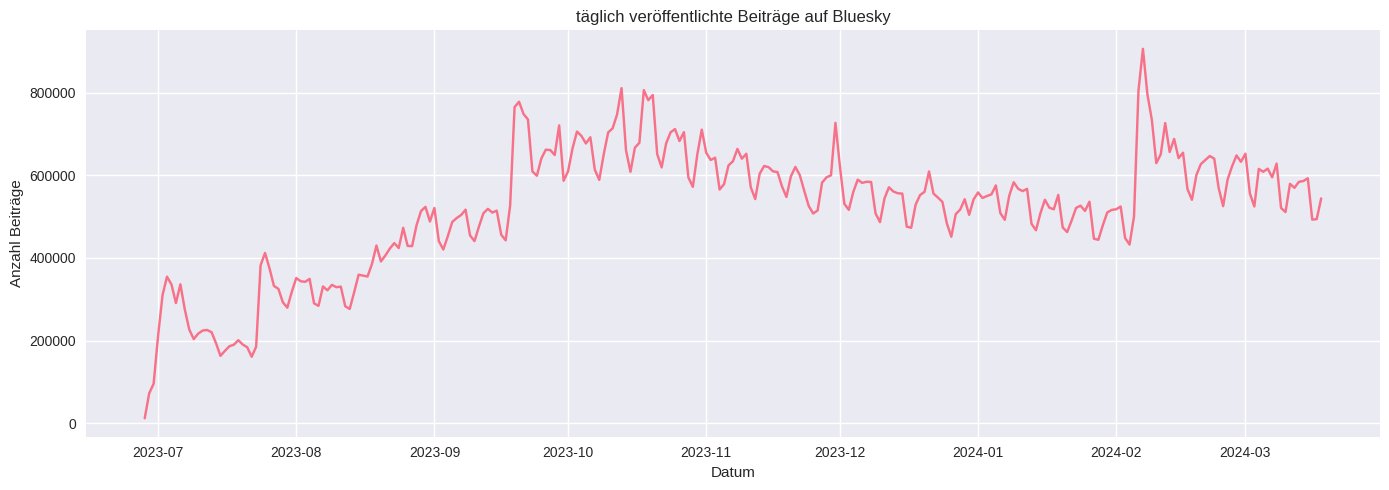

In [18]:
plt.figure(figsize=(14,5))
sns.lineplot(data = daily_stats, x = 'date', y = 'total_posts')
plt.title("täglich veröffentlichte Beiträge auf Bluesky")
plt.xlabel("Datum")
plt.ylabel("Anzahl Beiträge")
plt.tight_layout()
plt.show()

Es sieht so aus, als gäbe es ein periodisches Muster in den Daten. Lassen Sie uns herausfinden, was es ist.

### Aufgabe 2.2. – *Weekend whispers* (14 Punkte)

Zeitreihendaten über einen längeren Zeitraum (wie unsere täglichen Beiträge pro Tag auf Bluesky, die wir gerade geplottet haben) verhalten sich oft aufgrund verschiedener Komponenten so, wie sie es tun: einem allgemeinen Trend (nimmt die Posting-Aktivität zu oder ab?), einer Saisonalität (gibt es ein wiederkehrendes Muster?) und Residuen (gab es unerwartete Ereignisse?).

Eine Möglichkeit, diese Komponenten zu entflechten, ist die Season-Trend-Dekomposition mittels LOESS (STL).

STL ist ein leistungsfähiges Werkzeug, um im Detail zu verstehen, was die tägliche Posting-Aktivität auf Bluesky antreibt. Um STL jedoch auf unseren Datensatz anzuwenden, müssen wir angeben, welche Art von periodischem Muster oder Saisonalität wir erwarten. Anstatt zu raten, können wir unsere Daten betrachten und versuchen, ein periodisches Muster zu finden, das wir dann STL übergeben können. Überlegen Sie aber auch gerne, welche Saisonalitäten man in Daten wie unseren erwarten könnte.

#### Aufgabe 2.2.1. – Frequenzspektrum (6 Punkte)

Untersuchen Sie, ob die Anzahl der täglichen Beiträge einem periodischen Muster folgt (d. h., ob bestimmte Verhaltensweisen beim Posten sich im Laufe der Zeit regelmäßig wiederholen). Verwenden Sie dazu die Funktion `periodogram` aus `scipy.signal`, die die Power Spectral Density (PSD) der Zeitreihe schätzt. Eine PSD zeigt, wie viel der Gesamtvarianz („Power”) in der Zeitreihe mit verschiedenen Frequenzen zusammenhängt. Obwohl die Funktion Frequenzen ausgibt (wie oft etwas in Zyklen pro Tag auftritt), interessieren uns in der Regel eher Perioden (Länge eines vollständigen Zyklus in Tagen), da wir nach Mustern suchen, die sich alle X Tage wiederholen (Hinweis: Frequenz = 1 / Periode). Bei der Verwendung der Funktion `periodogram` interessieren uns vor allem die periodischen Komponenten der Zeitreihe. Sie können Trends oder nicht-periodische Komponenten mit dem integrierten Detrending-Argument berücksichtigen.

Zeichnen Sie die Leistung (y-Achse) für jede Anzahl von Tagen bis einschließlich 10 (x-Achse) auf. Was ist laut Ihrer Grafik die Hauptfrequenz in den Daten? Markieren Sie die maximale Power Ihrer Grafik mit einer andersfarbigen vertikalen Linie.

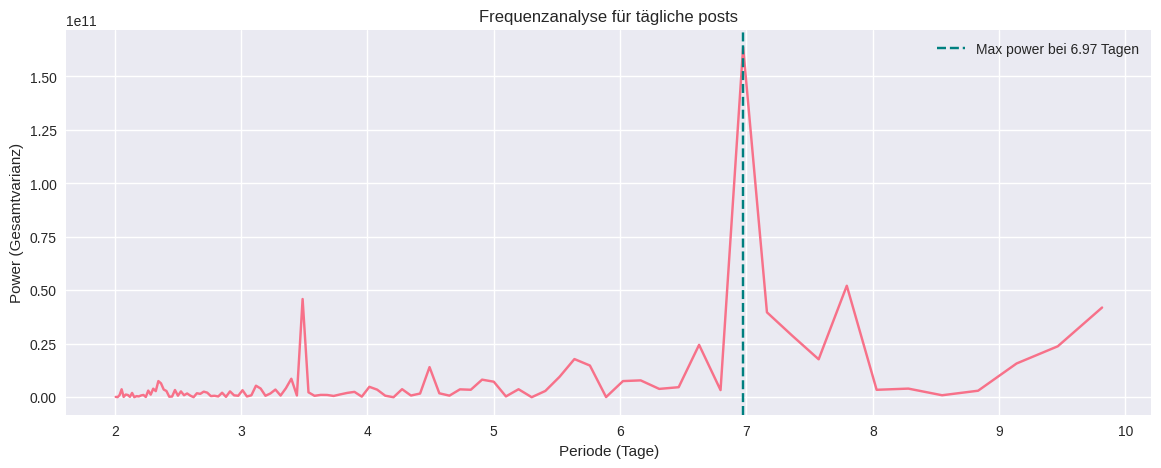

In [19]:
x = daily_stats['total_posts'].values # Benennung der Variablen nach Documentation https://docs.scipy.org/doc/scipy-1.16.0/reference/generated/scipy.signal.periodogram.html
frequencies, power = periodogram(x) # keine sampling frequency uebergeben, weil standard 1 ist (1/tag hier)

# Perioden bis zu 10 Tagen berechnen
periods = 1/frequencies
valid = (periods <= 10)

max_index = np.argmax(power[valid]) # um die Hauptfrequenz in der Grafik anzuzeigen

plt.figure(figsize=(14, 5))
plt.plot(periods[valid], power[valid])
plt.title("Frequenzanalyse für tägliche posts")
plt.xlabel("Periode (Tage)")
plt.ylabel("Power (Gesamtvarianz)")
plt.axvline(x=periods[valid][max_index], color='teal', linestyle='--', label=f'Max power bei {periods[valid][max_index]:.2f} Tagen') # Label mit ChatGPT erstellt
plt.legend()
plt.show()

**Antwort:** An der Grafik lässt sich eindeutig ablesen, dass die Hauptfrequenz bei etwa 7 Tagen liegt. Es scheint also ein wöchentliches Muster zu geben.

#### Aufgabe 2.2.2. – Saisonale Zerlegung (5 Punkte)

Nachdem Sie nun den Zeitraum festgelegt haben, den Sie untersuchen möchten, zerlegen Sie die Zeitreihe mit der Funktion `statsmodels.tsa.seasonal.STL`, um das saisonale Muster vom Gesamttrend und unerwarteten Ausschlägen oder Einbrüchen (Residuen) zu trennen. Verwenden Sie das Argument `robust=True`, um den Einfluss plötzlicher Sprünge in den Zeitreihendaten zu verringern. Zeichnen Sie die ursprüngliche Zeitreihe sowie die Komponenten `trend`, `seasonal` und `residual` auf und extrahieren Sie die saisonale Zeitreihe.

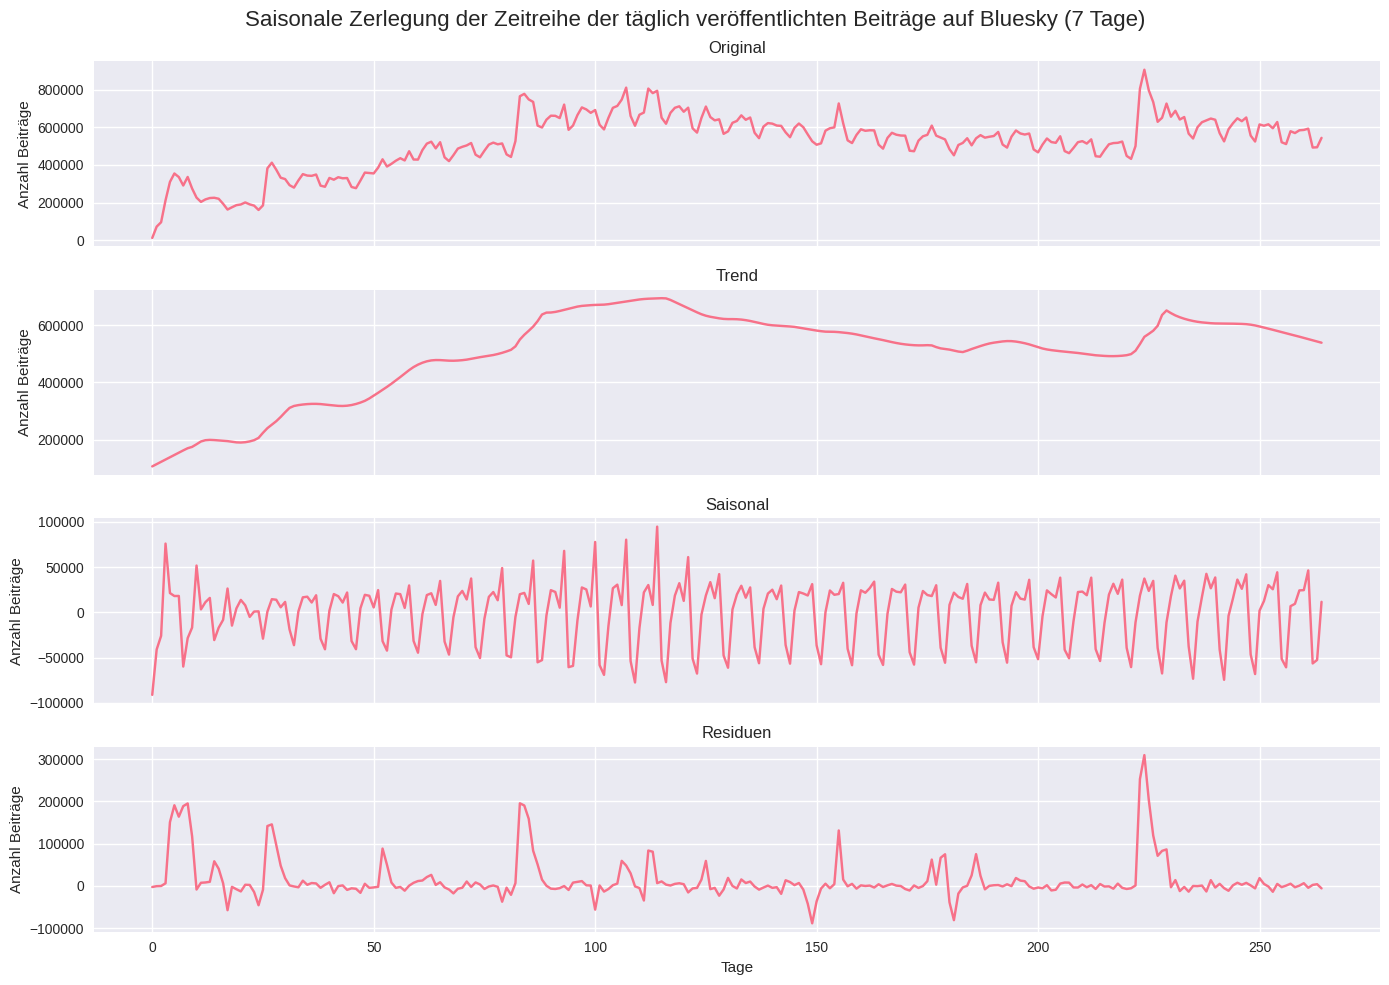

In [20]:
stl = STL(x, period = 7, robust = True)
estimation = stl.fit() # stl.fit estimates the season, trend and residual components (https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.STL.fit.html)

# subplots fuer mehr uebersichtlichkeit
fig, axes = plt.subplots(4, 1, figsize = (14, 10), sharex=True) # weil alle die gleiche x - achse haben

axes[0].plot(x)
axes[0].set_title("Original")
axes[0].set_ylabel("Anzahl Beiträge")

axes[1].plot(estimation.trend)
axes[1].set_title("Trend")
axes[1].set_ylabel("Anzahl Beiträge")

axes[2].plot(estimation.seasonal)
axes[2].set_title("Saisonal")
axes[2].set_ylabel("Anzahl Beiträge")

axes[3].plot(estimation.resid)
axes[3].set_title("Residuen")
axes[3].set_ylabel("Anzahl Beiträge")

plt.suptitle("Saisonale Zerlegung der Zeitreihe der täglich veröffentlichten Beiträge auf Bluesky (7 Tage)", fontsize = 16)
plt.xlabel("Tage") # kein datum gewählt damit e smit den originaldaten fittet
plt.tight_layout()
plt.show()

Es lässt sich ein deutliches wöchentliches saisonales Muster beobachten.

Die saisonale Zerlegung zeigt außerdem einen deutlichen Anstieg im Februar 2024, der sowohl im Trend als auch in den Residuen sichtbar ist. Wie lässt sich der Anstieg der Aktivität in diesem Zeitraum erklären?

Geben Sie anhand Ihrer Darstellung des STL-Trends eine Erklärung/Interpretation zur allgemeinen Entwicklung der Posting-Aktivität auf Bluesky ab.

**Antwort:** Im Februar öffnete Bluesky die Plattform für alle (vorher war eine Einladung für die Anmeldung nötig). Die Gesamtnutzeranzahl stieg von 3 Millionen auf mehr als 4 Millionen innerhalb einer Woche. (Quelle  = https://bsky.social/about/blog/12-30-2024-year-in-review)

Insgesamt lässt auch hier erkennen, dass es ein wöchentliches Muster in der Posting-Aktivität gibt. Im Saisonalen Graphen sieht man ein sich wiederholendes muster von aufeinanderfolegenden hochs/tiefs, was vermuten lässt, dass bestimmte Wochentage stets höhere Posting-Aktivität haben als andere. Am Trend (und auch der originalreihe) zeigt sich, dass die Posting -Aktivität tendenziell mit der Zeit zunimmt.
Es gibt ein paar Residuen wie der Anstieg im Februar, oder ganz zu Beginn der Plattform, welche auf äußere Besonderheiten wie die erstmalige Veröffentlichung oder die das öffnen der Plattform für alle zurückzuführen ist.

#### Aufgabe 2.2.3. – Wochentagseffekt (3 Punkte)

Fügen Sie der Zeitreihe, die in der Eigenschaft `seasonal` der STL-Zerlegung enthalten ist, basierend auf dem Datums-/Zeitindex eine Spalte `day_of_week` hinzu. Stellen Sie den durchschnittlichen saisonalen Effekt für jeden Wochentag als Balkendiagramm dar. An welchen Tagen sind die Nutzer am aktivsten und an welchen Tagen am wenigsten aktiv?

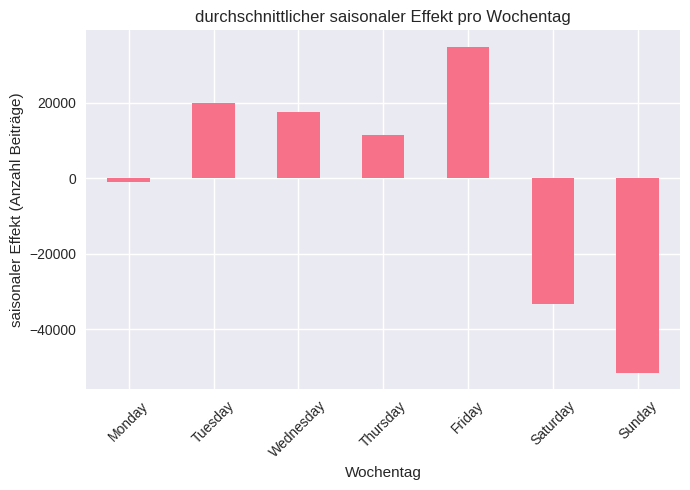

In [21]:
# für gliederung in wochentafe series erstellen was datetime index hat
x_series = pd.Series(x, index = daily_stats.index)
stl = STL(x_series, period=7, robust=True)
estimation_dated = stl.fit()

#zuerst seasonal df erstellen um es dann mit day_of:week zu kombinieren
seasonal = estimation_dated.seasonal.copy()
seasonal.name = 'seasonal_effect'
seasonal_df = pd.DataFrame(seasonal)
seasonal_df['day_of_week'] = seasonal_df.index.day_name()

avg_seasonal_by_weekday = (seasonal_df.groupby('day_of_week')['seasonal_effect']
                                               .mean()
                                               .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
                          )

plt.figure(figsize=(7,5))
avg_seasonal_by_weekday.plot(kind='bar')
plt.title("durchschnittlicher saisonaler Effekt pro Wochentag")
plt.xlabel("Wochentag")
plt.xticks(rotation=45)
plt.ylabel("saisonaler Effekt (Anzahl Beiträge)")
plt.tight_layout()
plt.show()

### Aufgabe 2.3. – Stimmungsdaten (2 Punkte)

Zeichnen Sie die Nutzerstimmung und die durchschnittliche Post-Stimmung im Zeitverlauf auf und berechnen Sie die Korrelation zwischen den beiden Zeitreihen.

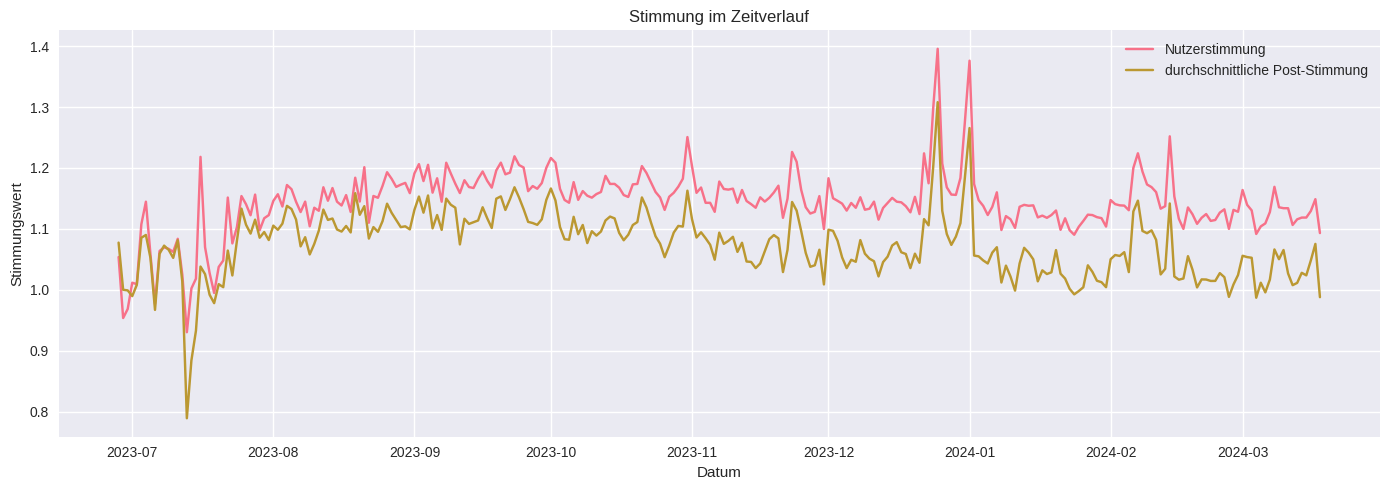

Die Korrelation zwischen den beiden Zeitreihen beträgt:  0.847755208395869


In [22]:
# Zeitreihen benötigt:
user_sentiment_ts = daily_stats['mean_sentiment_per_user']
post_sentiment_ts = daily_stats['mean_post_sentiment']

plt.figure(figsize=(14,5))
plt.plot(user_sentiment_ts, label = "Nutzerstimmung")
plt.plot(post_sentiment_ts, label = "durchschnittliche Post-Stimmung")
plt.title("Stimmung im Zeitverlauf")
plt.xlabel("Datum")
plt.ylabel("Stimmungswert")
plt.legend()
plt.tight_layout()
plt.show()

correlation = user_sentiment_ts.corr(post_sentiment_ts)
print("Die Korrelation zwischen den beiden Zeitreihen beträgt: ", correlation)

Diese positive und recht hohe Korrelation zeigt was auch graphisch zu erkennen ist: die Nutzerstimmung und die durchschnittlihe Post-Stimmung korrelieren.

### Aufgabe 2.4. – *Montagsblues?* (4 Punkte)

#### Aufgabe 2.4.1. – Saisonale Zerlegung (2 Punkte)

Wiederholen Sie die gleichen Schritte für die saisonale Zerlegung und wenden Sie sie nun mit der Funktion `statsmodels.tsa.seasonal.STL` auf die Stimmungsdaten an. Sie müssen die Frequenzspektrumanalyse nicht erneut durchführen. Wir nehmen die a-priori-Periode von 7 Tagen.

Stellen Sie die Zerlegung der Komponenten `trend`, `residual` und `seasonal` grafisch dar.

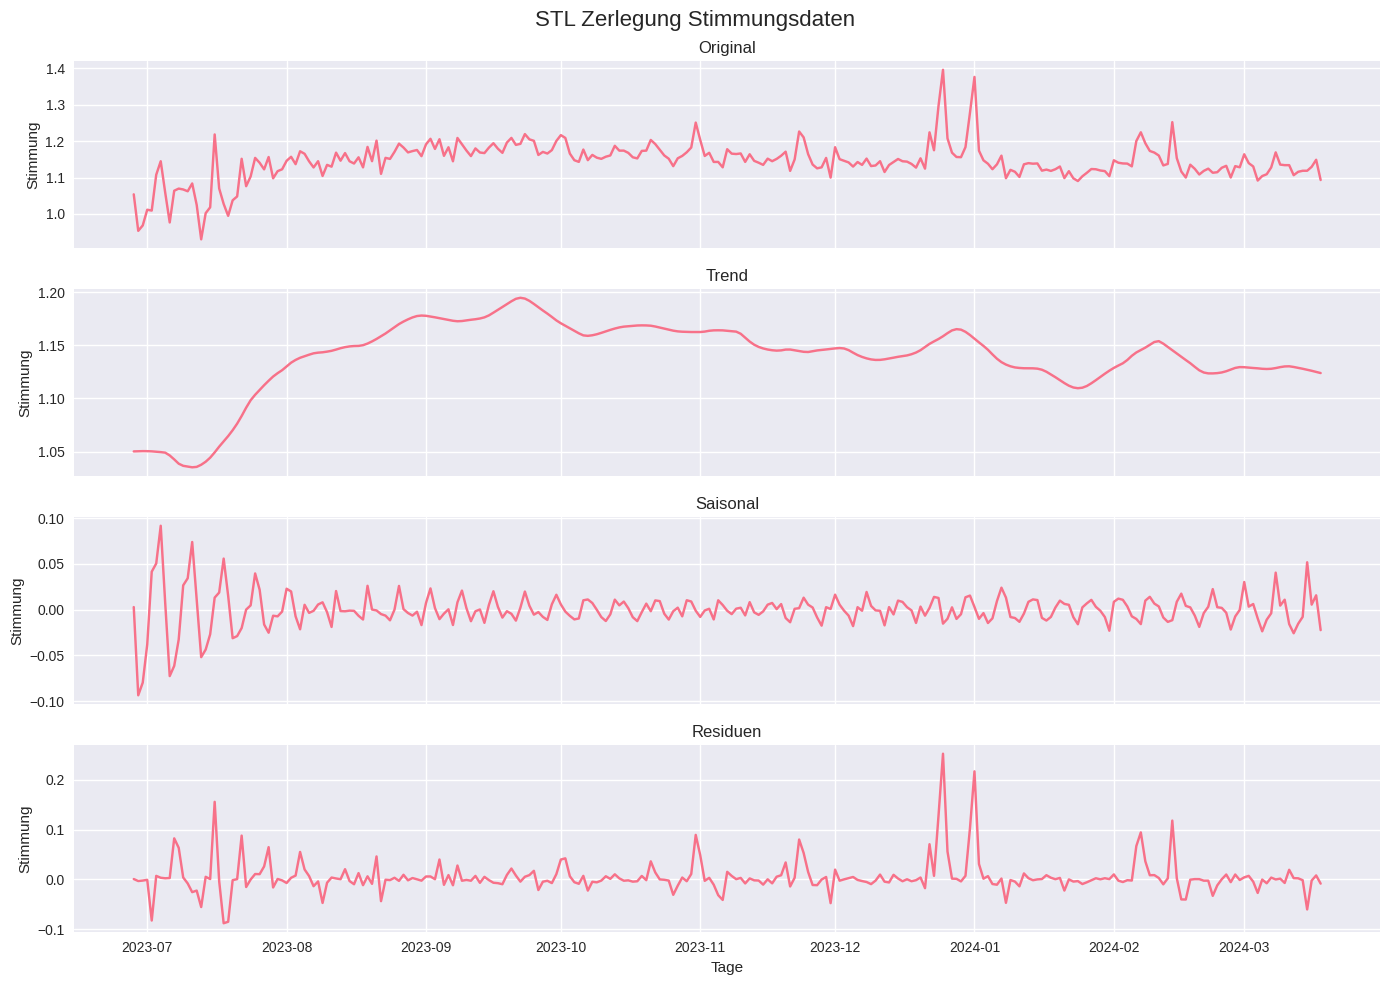

In [23]:
stl_sentiment = STL(user_sentiment_ts, period=7, robust=True) # Parameter wie oben 
result_sentiment = stl_sentiment.fit()

# subplots fuer mehr uebersichtlichkeit
fig, axes = plt.subplots(4, 1, figsize = (14, 10), sharex=True) # weil alle die gleiche x - achse haben

axes[0].plot(user_sentiment_ts)
axes[0].set_title("Original")
axes[0].set_ylabel("Stimmung")

axes[1].plot(result_sentiment.trend)
axes[1].set_title("Trend")
axes[1].set_ylabel("Stimmung")

axes[2].plot(result_sentiment.seasonal)
axes[2].set_title("Saisonal")
axes[2].set_ylabel("Stimmung")

axes[3].plot(result_sentiment.resid)
axes[3].set_title("Residuen")
axes[3].set_ylabel("Stimmung")

plt.suptitle("STL Zerlegung Stimmungsdaten", fontsize = 16)
plt.xlabel("Tage") # kein datum gewählt damit e smit den originaldaten fittet
plt.tight_layout()
plt.show()

Nennen Sie zwei Ereignisse, die in den Residuen zu sehen sind.

**Antwort**
- Plötzliche anstiege gegen Ende Dezember 2023 und Anfang Januar 2024 könnten mit Weihnachten und Silvester/Neujahr und damit einhergeheder positiver Stimmung zusammenhängen.
- stärklere Anstiege im Februar, was auf die neuen Nutzer nach der Öffnung für alle  (und eventuell mehr positive Interaktionen durch diese) zurückzuführen sein könnte.

#### Aufgabe 2.4.2. – Wochentagseffekt (2 Punkte)

Stellen Sie den Einfluss des Wochentags auf die durchschnittliche Stimmung grafisch dar. Was sehen Sie?

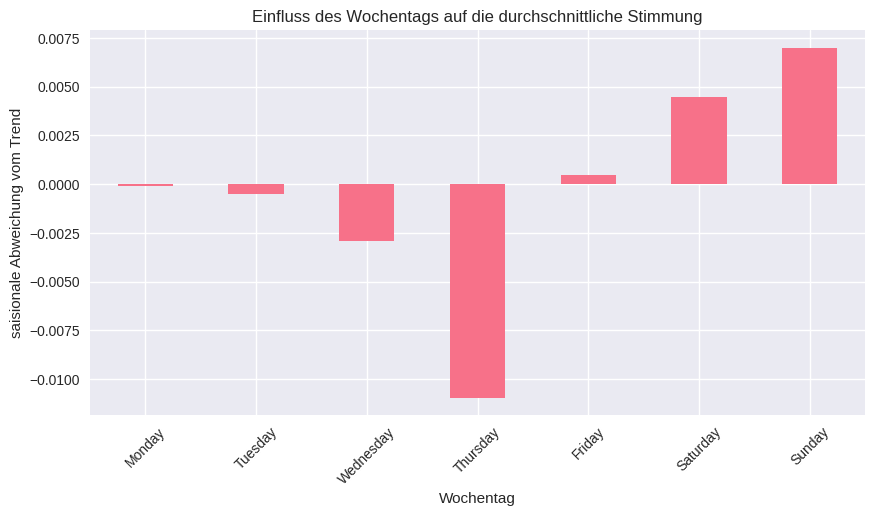

In [24]:
seasonal_sentiment = result_sentiment.seasonal.copy() # die seasonal daten werden für die wochentagsanalyse gebraucht
seasonal_df = seasonal_sentiment.to_frame(name='seasonal')
seasonal_df['day_of_week'] = seasonal_df.index.day_name()

weekday_avg = (seasonal_df.groupby('day_of_week')['seasonal']
               .mean()
               .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
              )

plt.figure(figsize=(10,5))
weekday_avg.plot(kind='bar')
plt.title("Einfluss des Wochentags auf die durchschnittliche Stimmung")
plt.xlabel("Wochentag")
plt.xticks(rotation=45)
plt.ylabel("saisionale Abweichung vom Trend")
plt.show()

### Aufgabe 2.5. – Sehr aktive Nutzer (2 Punkte)

Zu guter Letzt wollen wir uns die Verteilung der durchschnittlichen Anzahl von Beiträgen pro Tag der Bluesky-Nutzer ansehen. Transformieren Sie die Daten so, dass eine Verteilung sichtbar wird. Was sehen Sie?

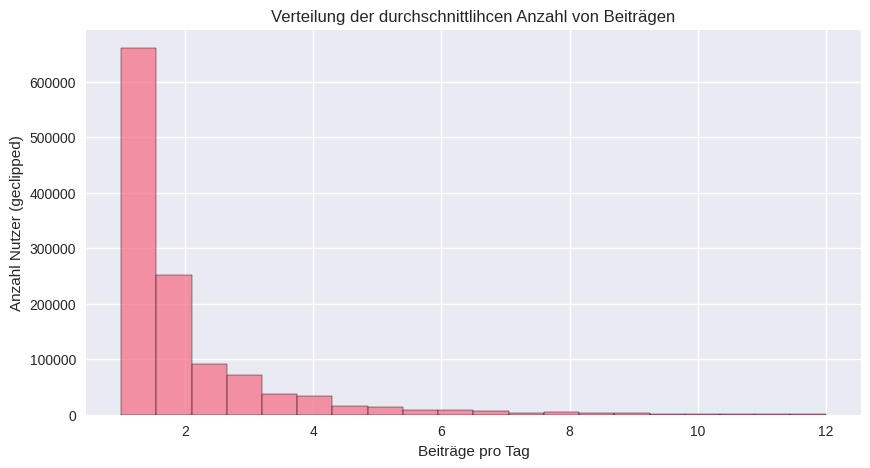

In [25]:
# extreme werte ansvheniden, damit man die verteilung besser sieht:
clipped = combined_user_stats[combined_user_stats['avg_posts_per_day'] < 12]

plt.figure(figsize=(10,5))
sns.histplot(clipped['avg_posts_per_day'], bins=20) # größere bins für mehr Sichtbarkeit der Verteilung
plt.title("Verteilung der durchschnittlihcen Anzahl von Beiträgen")
plt.xlabel("Beiträge pro Tag")
plt.ylabel("Anzahl Nutzer (geclipped)")
plt.show()

**Antwort**: man sieht, dass die allermeisten Nutzer wenige Beiträge verfassen und nur sehr wenige einzelne viele (mehr als 10 z.b. kaum noch welche)

___
## Aufgabe 3: Statistiken (17 Punkte)

### Aufgabe 3.1. – Auswirkungen des Wochentags auf das Posting-Verhalten (6 Punkte)

Um festzustellen, ob die Auswirkungen des Wochentags auf die Anzahl der Posts signifikant sind, verwenden wir eine lineare Regression, um ein statistisches Maß zu erhalten. Regressieren Sie das extrahierte saisonale Muster vom Wochentag. Informieren Sie sich über die Dummy variable trap und vermeiden Sie diese, indem Sie **keinen** Intercept einbeziehen. Überlegen Sie, was dies bedeutet oder wie das Modell und seine Ergebnisse zu interpretieren sind, und denken Sie daran, was die saisonale Komponente widerspiegelt (oder lesen Sie noch einmal darüber nach). Geben Sie dann die Gesamtstatistik für das Modell und die Statistiken für die Auswirkungen der verschiedenen Wochentage unter Verwendung eines Signifikanzniveaus von &alpha; = 0,05 an und interpretieren Sie die Ergebnisse.

**Dummy Variable Trap** = tritt in Regressionsanalyse auf, wenn alle Kategorien einer (kategorialen) Variable als vatiable ins System aeingeführt wird. Es passiert wenn zu viele Dummy Variablen benutzt werden während ein Intervcept (also eine Konstante z.b. 1) im Modell ist. Es entsthet Multikollinearität, eine Variable kann durch die Kombination der anderen vorhergesagt werden. 
Wenn man hier also 7 Dummy Variablen für die 7 Wochentage und einen Intervept verwerndet, dann weiß man automatisch welchen wert ein wochentag hat wenn man die werte aller anderen wochentage kennt. man kann damit also nicht eindeutig den einfluss einzigen Tages abschätzen.

Die Regression wird auf der **saisonalen Kommponenten**  der Zeitreihe durchgeführt, also dort wo regelmäßige wiederkehrende Muster wie z.B. der Wochenrythmus beschrieben wird
 
Quelle für dummy variable trap definition: https://globalschoolofeconomics.com/econometrics-what-is-the-dummy-variable-trap/

In [26]:
seasonal.head()

date
2023-06-28   -91206.649582
2023-06-29   -41017.346947
2023-06-30   -26033.242426
2023-07-01    75966.974401
2023-07-02    21292.817630
Name: seasonal_effect, dtype: float64

In [27]:
seasonal.name ="seasonal_posts" # für spalte nach umwandlung in df
seasonal_df = pd.DataFrame(seasonal) # dataframe dem die neue spalte hinzugefügt werden kann
seasonal_df['day_of_week'] = seasonal_df.index.day_name()

# dummy variable ohne intercept erstellen um dummy variable trap zu vermeiden:
X = pd.get_dummies(seasonal_df['day_of_week'], drop_first = False) #weil alle wochentage reinsollen
y = seasonal_df['seasonal_posts']

model = sm.OLS(y, X).fit()

print(model.summary()) # wochentage sind in alphabetischr reihenfolge statt in zeitlicher aber ist nicht so relevant für die Interpretation de ergebnisse...

                            OLS Regression Results                            
Dep. Variable:         seasonal_posts   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     95.57
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           1.13e-62
Time:                        20:47:15   Log-Likelihood:                -2992.1
No. Observations:                 265   AIC:                             5998.
Df Residuals:                     258   BIC:                             6023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Friday      3.493e+04   3186.327     10.961      0.0

### Interpretation der Ergebnisse
- R²sagt, dass ca- 69% der Varianz der saisonalen Komponente durch den Wochentag erklärt werden kann. 
- an F-statistix=95.57 und de, zugehörigen p-wert =1.13e-62 zeigt sich, dass das Modell hochsignifikant ist.
generell:
- jeder koeffizient ist der durchscnittswert der saisonale Komponente für den jeweiligen Wochentag
- wenn p < 0.05 dann gibt es einen signifikanten Unterschied zur Gesamatvarianz
wochentage:
- montag: ist statistisch nich tsignifikant, weil p=0.736 > 0.05, es liegt also statistisch etwa auf dem durchschnitt
- (wochentage dienstag bis sonntag sind statistisch signifikant, weil der p-wert immer y 0.05 ist
- dienstag hat signifikant mehr beiträge ( coeff = 19840) als im wochendurchscnitt
- mittwoch:ebenfalls mehr beiträge
- donnersta: leicht mehr beiträge
- freitag: hat deutklich mehr beiträge, hier ist der höchste anstieg, es ist der aktivste Tag
- samstag: ein stark negativer effekt, deutlich werniger posts
- sonntag: noch stärkerer negativer effekt, es ist der inaktivste Tag

Insgesamt wird freitags am meisten gepostet und an Samstag und vor allem sonntag am wenigsten. 

Als strenge Statistiker müssen wir eine Korrektur für multiple Vergleiche vornehmen, da wir 7 Tests durchführen. Führen Sie eine Korrektur für multiple Vergleiche durch. Sind die Wochentagseffekte immer noch signifikant?

um das probpel mit den multiplen vergleichen zu lösen wird die BOnferroni korrekjtur angewandt, weil sie einfach zu implementirwen ist . jeder p-wert wird mit der ANzahl der Tests multipliziert, um zu prüfen, ob er noch unter alpha (0.05) liegt

In [28]:
pvals = model.pvalues.values # werte für die korrektur extrahieren

# Bonferroni-Korrektur (von chatgpt)
_, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='bonferroni')

# automatische ausgabe für mehr uebersichtlichkeit:
for day, pval, pval_corr in zip(X.columns, pvals, pvals_corrected):
    print(f"{day}: p={pval:.4f}, korrigiert={pval_corr:.4f}, signifikant={pval_corr < 0.05}")


Friday: p=0.0000, korrigiert=0.0000, signifikant=True
Monday: p=0.7364, korrigiert=1.0000, signifikant=False
Saturday: p=0.0000, korrigiert=0.0000, signifikant=True
Sunday: p=0.0000, korrigiert=0.0000, signifikant=True
Thursday: p=0.0004, korrigiert=0.0028, signifikant=True
Tuesday: p=0.0000, korrigiert=0.0000, signifikant=True
Wednesday: p=0.0000, korrigiert=0.0000, signifikant=True


**Antwort** die Wochentagseffejte sind gensauso signifikant (bzw. nicht für montags) wie vorher

### Aufgabe 3.2. – Auswirkungen der Wochentage auf die Stimmung der Nutzer (4 Punkte)

Wir wiederholen das Verfahren zur Stimmungsanalyse, um zu sehen, ob wir tatsächlich Muster der Auswirkungen pro Wochentag ableiten können. Gilt dies auch nach Korrektur für multiple Vergleiche? Haben Wochentage einen stärkeren Einfluss auf Beiträge oder die Stimmung?

In [29]:
sentiment_ts = daily_stats['mean_post_sentiment']

stl_sentiment = STL(sentiment_ts, period=7, robust=True).fit() # 7 wochentage, robust gegen ausreißer
seasonal_sentiment = stl_sentiment.seasonal.to_frame(name="seasonal_sentiment")
seasonal_sentiment['day_of_week'] = seasonal_sentiment.index.day_name()

X_s = pd.get_dummies(seasonal_sentiment['day_of_week'], drop_first=False) # dummy variablen der wochentage ohne intercept wie oben
y_s = seasonal_sentiment['seasonal_sentiment']

model_s = sm.OLS(y_s, X_s).fit() # lineare regression
print(model_s.summary())

# Bonferroni Korrektur, um multiple Tests zu berücksichtigen
pvals_s = model_s.pvalues.values
_, pvals_corr_s, _, _ = multipletests(pvals_s, alpha=0.05, method='bonferroni')

# formattierte ausgabe der ergebnisse (von chatGPT)
for day, pval, pval_corr in zip(X_s.columns, pvals_s, pvals_corr_s):
    print(f"{day}: p={pval:.4f}, korrigiert={pval_corr:.4f}, signifikant={pval_corr < 0.05}")



                            OLS Regression Results                            
Dep. Variable:     seasonal_sentiment   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     16.16
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           8.83e-16
Time:                        20:47:15   Log-Likelihood:                 719.48
No. Observations:                 265   AIC:                            -1425.
Df Residuals:                     258   BIC:                            -1400.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Friday         0.0013      0.003      0.508      0.6

**"Gilt das auch nach Korrektur für multiple Vergleiche?"** Ja, aber nicht für alle Wochentage. Freitag ist nicht signifikant (und dienstag nur grenzwertig). Insgesamt zeigt sich, dass Donnerstag, sowie Samstag & Sonntag besonders starke Einflüsse auf die Stimmung haben (Das korrelliert auch mit der visualisierung im Balkendiagramm weiter oben)

**"Haben Wochentage einen stärkeren Einfluss auf Beiträge oder die Stimmung?"** Ja,der Wochentag hat deutlich stärkeren Einfluss auf Beiträge als die Stimmung, denn der R²=0.273 ist bei der Stimmung deutlich geringer (vgl zu R²=069 bei Wochentag), es gibt also eine nschwächeren Einfluss. Es gubt zwar einen Zusammenhang, aber die meisten Schwankungen /varianz wird durch andere Faktoren erklärt.

### Aufgabe 3.3. – Bot-ähnliches Verhalten und Nutzerstimmung (7 Punkte)

Nun werfen wir einen Blick auf die Benutzerdaten. Im Preprocessing-Teil haben wir bereits einen Datenrahmen mit Features erstellt, die die Benutzer charakterisieren. Da einige Benutzer weit mehr als die durchschnittliche Anzahl an Beiträgen pro Tag veröffentlichen, scheint es, als befänden sich Bots im Netzwerk, die eine große Anzahl an Beiträgen erstellen. Leider enthält unser Datensatz keine Features, die angeben, ob ein Nutzer ein Bot ist oder nicht. Da wir jedoch zuvor eine Liste mit Features erstellt haben, können wir nun versuchen, diese zu nutzen, um einige Regeln aufzustellen.

Erstellen Sie eine neue Spalte `is_bot` im Datensatz basierend auf folgender Logik:\
Ein Nutzer wird als Bot markiert, wenn beide folgenden Bedingungen erfüllt sind:
1. Sehr hohe Aktivität: `post_count_total` > 1000
2. Posting-Frequenz ist sehr regelmäßig: `cv_days_between_posts` < 0.5

In Aufgabe 1.2 wurden mehrere Features basierend auf dem zeitlichen Abstand zwischen Beiträgen für jeden Nutzer berechnet: `"mean_days_between_posts", "median_days_between_posts", "std_days_between_posts", "cv_days_between_posts"`.

Allerdings fehlen bei einigen Nutzern ein oder mehrere dieser Werte – zum Beispiel bei Nutzern, die nur einmal oder gar nicht gepostet haben. Entfernen Sie alle Zeilen aus dem Datensatz, bei denen einer dieser vier Werte fehlt (NaN).

In [30]:
# relevante spalten um nur bei ihnen die nans zu entfernen
relevant_columns = ["mean_days_between_posts", "median_days_between_posts", "std_days_between_posts", "cv_days_between_posts"]
cleaned_user_df = combined_user_stats.dropna(subset = relevant_columns)

#bot-regeln anwenden:
cleaned_user_df['is_bot'] = (
    (cleaned_user_df['total_posts']>1000) & 
    (cleaned_user_df['cv_days_between_posts'] < 0.05)
)
# WIe viele bots wurden gefunden?
print("Anzahl erkannter Bots: ", cleaned_user_df['is_bot'].sum())
print("Prozentualer Anteil: ", cleaned_user_df['is_bot'].mean() * 100, "%")

Anzahl erkannter Bots:  974
Prozentualer Anteil:  0.10356644999941517 %


Testen Sie, ob sich Bots und Nicht-Bots in den folgenden Metriken signifikant unterscheiden:
1. `sentiment_mean`
2. `sentiment_std`

Für jede Metrik:
- Stellen Sie beide Verteilungen (Bots und Nicht-Bots) für beide Metriken mit geeigneten Diagrammen dar.
- Wählen Sie einen geeigneten Test (parametrisch, nichtparametrisch oder Bootstrapping).
- Begründen und überprüfen Sie die Annahmen Ihres Tests.
- Geben Sie Ihren p-Wert an und ob er signifikant ist.

als geeignete Diagrammart wurde ein Histogramm gewählt, weil hier die Verteilung auch bei kleinen Gruppen sichtbar ist (was wichtig ist, weil die Bots nur vergeleichsweise sehr wenig sind und es in anderen Diagrammarten kaum sichtbr war):

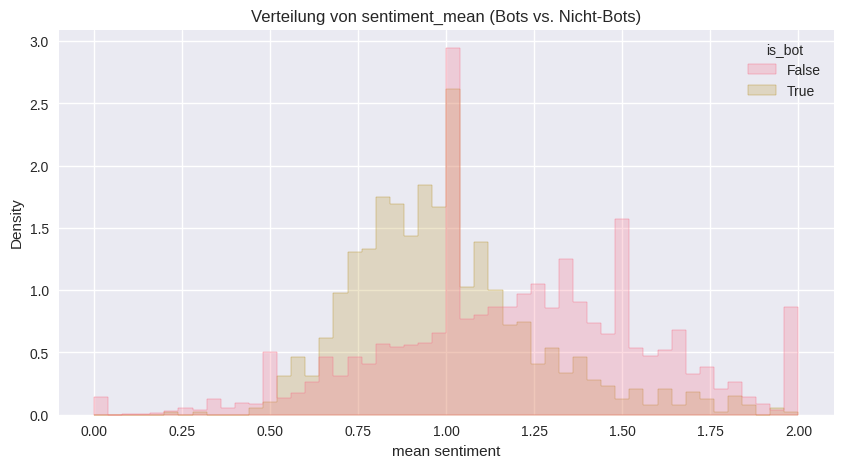

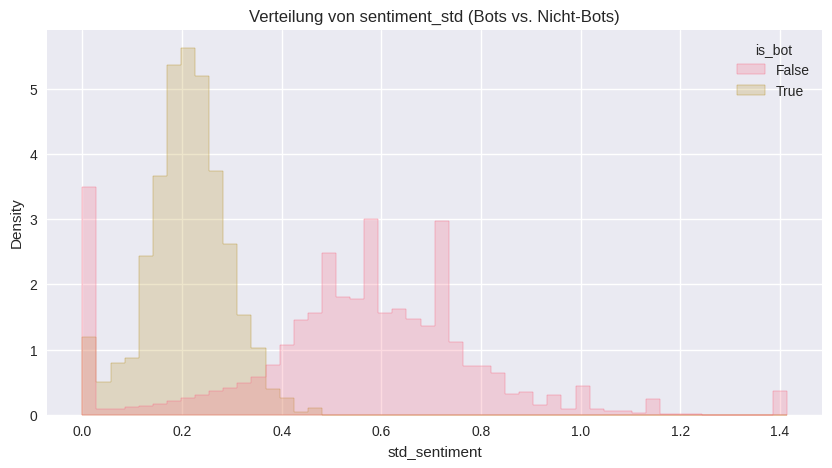

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(data=cleaned_user_df, x="mean sentiment", hue="is_bot", element="step", stat="density", common_norm=False, bins=50)
plt.title("Verteilung von sentiment_mean (Bots vs. Nicht-Bots)")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=cleaned_user_df, x="std_sentiment", hue="is_bot", element="step", stat="density", common_norm=False, bins=50)
plt.title("Verteilung von sentiment_std (Bots vs. Nicht-Bots)")
plt.show()

In [32]:
from scipy.stats import shapiro # verwendet, um auf normalverteilung zu testen 

# prüfen, ob es normalverteilung wie angenommen ist: 
print("Shapiro-Wilk-Test für Normalverteilung:")
print("Bots - mean sentiment:", shapiro(cleaned_user_df[cleaned_user_df['is_bot']]['mean sentiment']))
print("Nicht-Bots - mean sentiment:", shapiro(cleaned_user_df[~cleaned_user_df['is_bot']]['mean sentiment']))
print("Bots - std_sentiment:", shapiro(cleaned_user_df[cleaned_user_df['is_bot']]['std_sentiment']))
print("Nicht-Bots - std_sentiment:", shapiro(cleaned_user_df[~cleaned_user_df['is_bot']]['std_sentiment']))

Shapiro-Wilk-Test für Normalverteilung:
Bots - mean sentiment: ShapiroResult(statistic=np.float64(0.9541332917625923), pvalue=np.float64(7.024364566309013e-17))
Nicht-Bots - mean sentiment: ShapiroResult(statistic=np.float64(0.9911952026812463), pvalue=np.float64(1.4129820991585387e-84))
Bots - std_sentiment: ShapiroResult(statistic=np.float64(0.9859470938306387), pvalue=np.float64(4.696325438177552e-08))
Nicht-Bots - std_sentiment: ShapiroResult(statistic=np.float64(0.9414046818981652), pvalue=np.float64(1.808921743076638e-136))


Da die werte für statistiv bei 0.95 & 0.99 sowie 0.98 %0.94 liegen und die p-values alle extrem klein sind, ist keine der Verteilungen normalverteilt.  Deswegen braucht man einen nichtparametrischen Test für unabhängige Stichproben wie z.B: den **Mann-Whitney U-Test** (die Bedingung füt eine metrische skala der sentimentwerte ist auch erfüllt)

In [33]:
# gruppen für test trennen:
bots = cleaned_user_df[cleaned_user_df['is_bot']]
non_bots = cleaned_user_df[~cleaned_user_df['is_bot']]

stat_mean, p_mean = mannwhitneyu(bots["mean sentiment"], non_bots["mean sentiment"], alternative='two-sided' )


stat_std, p_std = mannwhitneyu(bots["std_sentiment"], non_bots["std_sentiment"], alternative='two-sided' )

#besser formattiertte Ausgabe mit ChatGPT:
print(f"p-Wert für sentiment_mean: {p_mean:.4f}")
print(f"p-Wert für sentiment_std: {p_std:.4f}")

p-Wert für sentiment_mean: 0.0000
p-Wert für sentiment_std: 0.0000


Die p-werte sind beie signifikant, das p<0.05. Es lässt sich also Interpretieren, dass Bots im Durchscnoitt eine andere Stimmung posten als Nicht-Bots (/echte user) und die Streuung der Stimmung unterschiedet sich ebenfalls zwischen bots un d nicht-bots. Das könnte daran liegen, dass Bots eher zu gleichbleibendem automatisireten Nachrichten tendieren, die weniger Schwankungen zeigen als von Menschen spontan verfasste Nachrichten

___ 
## Aufgabe 4: Machine Learning (40 Punkte)

### Aufgabe 4.1. – Unsupervised Learning (15 Punkte)

Anstatt uns auf fest programmierte Regeln zur Erkennung von Bots zu verlassen, wenden wir uns nun dem unsupervised Machine Learning zu, um Nutzer mit abnormalen Verhaltensmustern zu identifizieren.

Wir könnten zwar unsere regelbasierten Bot-Labels zum Trainieren eines überwachten Modells verwenden, doch dadurch würde das Modell lediglich lernen, genau die von uns definierten Regeln zu replizieren – es würde also im Grunde nichts Neues lernen. Da wir nicht vollständig davon überzeugt sind, dass diese Regeln genau das erfassen, was einen Bot ausmacht, entscheiden wir uns, sie nicht als Grundwahrheit zu verwenden.

Ohne gekennzeichnete Beispiele für Bots und Nicht-Bots können wir jedoch kein überwachtes Lernen anwenden. Hier kommen unsupervised Lernmethoden wie Clustering oder Anomalieerkennung ins Spiel. Diese Ansätze ermöglichen es uns, potenziell verdächtiges Nutzerverhalten ohne vordefinierte Kennzeichnungen zu entdecken und können dabei helfen, neue Muster aufzudecken, die unsere handgefertigten Regeln möglicherweise übersehen würden.

Für diese Aufgabe verwenden wir den Isolation-Forest-Algorithmus, eine beliebte Methode zur Anomalieerkennung. Ein Isolation Forest ist ein Ensemble aus vielen Isolation Trees, daher der Name „Forest“ (Wald). Ein Ensemble ist eine Technik, bei der mehrere Modelle kombiniert werden, um ein stärkeres, robusteres Modell zu erstellen. Während einzelne Modelle – insbesondere wenn sie randomisiert sind – Fehler machen oder ineffiziente Wege einschlagen können, hilft die Kombination vieler Modelle (z. B. durch Mittelwertbildung oder Abstimmung) dabei, den Einfluss dieser einzelnen Fehler zu reduzieren und konsistente Muster über die Modelle hinweg zu verstärken.

Ein Isolation Tree ist ein [Baum](https://de.wikipedia.org/wiki/Baum_(Graphentheorie)), der durch rekursive Partitionierung der Daten funktioniert. An jedem Knotenpunkt wird Folgendes durchgeführt:
- Zufällige Auswahl eines Features.
- Auswahl eines zufälligen Teilungswerts zwischen dem Minimum und Maximum dieses Features innerhalb der aktuellen Teilmenge.
- Entsprechende Teilung der Daten und Wiederholung des Vorgangs für jede Untergruppe.

Dies wird so lange fortgesetzt, bis jeder Datenpunkt in seinem eigenen Blatt isoliert ist oder eine maximale Tiefe erreicht ist. Die Intuition hinter dieser Methode ist, dass Anomalien leichter zu isolieren sind – sie erfordern weniger Teilungen, um vom Rest der Daten getrennt zu werden.

Im Isolation Forest berechnen wir für jeden Datenpunkt einen Anomalie-Score auf der Grundlage der durchschnittlichen Pfadlänge (d. h. der Anzahl der Teilungen), die erforderlich ist, um diesen Punkt über alle Bäume hinweg zu isolieren. Punkte mit kürzeren durchschnittlichen Pfadlängen werden als anomaler angesehen.

Weitere Informationen zu Isolation Forests finden Sie [hier](https://www.datacamp.com/tutorial/isolation-forest).

#### Aufgabe 4.1.1. - Feature Engineering (1 Punkt)

Zur Vorbereitung auf das unüberwachte Lernen müssen Sie einen sauberen Satz numerischer Features extrahieren, die das Nutzerverhalten und die Nutzerinteraktion beschreiben. Wählen Sie nur die folgenden Spalten aus, die aussagekräftige Verhaltens- und Interaktionsmetriken darstellen: `‚post_count_total‘, ‚sentiment_mean‘, ‚sentiment_std‘, ‚replied_count‘, ‚reposted_count‘, ‚quoted_count‘, ‚days_active‘, ‚cv_days_between_posts‘, ‚replied_count_by_others‘, ‚reposted_count_by_others‘, ‚quoted_count_by_others‘`

In [34]:
selected_features=['total_posts', 'mean sentiment', 'std_sentiment', 'replied_count', 
                   'reposted_count','quoted_count', 'active_days', 'cv_days_between_posts', 
                   'replied_count_by_others', 'reposted_count_by_others', 'quoted_count_by_others']

#neue feature matrix erstellen damit nur die aussagelkräfrigen  Metriken dargestellt werden:
user_features =combined_user_stats[selected_features].copy()

#fuer isolationforest sicherheitshalber alle nans entfernen:
user_features_clean = user_features.dropna()

#### Aufgabe 4.1.3. - IsolationForest (4 Punkt
Verwenden Sie die ausgewählten verhaltens- und sentimentbasierten Features, um mithilfe eines Isolation Forest anomale Benutzer im Datensatz zu erkennen. \
Legen Sie Parameter für Reproduzierbarkeit und Vergleichbarkeit fest:
- Verwenden Sie einen festen `random_state`.
- Setzen Sie den Parameter `contamination` so, dass er dem Anteil der Bots im Datensatz entspricht, wie in Aufgabe 3.3 ermittelt. Dadurch wird sichergestellt, dass das Isolation-Forest-Modell eine vergleichbare Klassifizierung wie Ihre früheren regelbasierten `is_bot`-Labels für Aufgabe 4.1.5 liefert.

In [35]:
# Nur numerische Features, keine NaNs
X = user_features_clean.copy()

# Standardisieren, weol IsolationForest distanzbasiert arbeitet
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

bot_rate = cleaned_user_df['is_bot'].mean()  

iso_model = IsolationForest(random_state=42, contamination=bot_rate)
iso_preds = iso_model.fit_predict(X_scaled)


user_features_clean['isolation_forest_label'] = (iso_preds == -1)# -1 = Anomalie (Bot), 1 = normaler Nutzer


print("Anzahl erkannter Anomalien (Isolation Forest):", user_features_clean['isolation_forest_label'].sum())
print("Prozentualer Anteil:", user_features_clean['isolation_forest_label'].mean() * 100, "%")


Anzahl erkannter Anomalien (Isolation Forest): 725
Prozentualer Anteil: 0.10272381038743171 %


In [36]:
X = user_features_clean.copy()

# standardisieren, weil Isolation_forest distanzbariert arbeitet
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# bot anteil ist contamination wert
bot_rate = cleaned_user_df['is_bot'].mean()
print("contamination wert (bot anteil: )", bot_rate)
iso_model = IsolationForest(random_state=42, contamination=bot_rate)
iso_preds = iso_model.fit_predict(X_scaled)

user_features_clean['isolation_forest']=(iso_preds==-1)

print("Anzahl erkannter ANomalien(Isolation Forest): ", user_features_clean['isolation_forest'].sum())
print("prozentualer Anteil = ", user_features_clean['isolation_forest'].mean() * 100, "%")

contamination wert (bot anteil: ) 0.0010356644999941517
Anzahl erkannter ANomalien(Isolation Forest):  720
prozentualer Anteil =  0.10201537031579425 %


**Interpretation** Der ANteil der erkannten ANomalien ist sehr gering. das passt zum niedrigen contamination wertvon nur 0.001. Mit Isolation forest gibt es also eine ähnlich strenge Regel wie durch die manuelle Regel

#### Aufgabe 4.1.4. - Feature-Bedeutung (5 Punkte)

Nach dem Training Ihres IsolationForest ist es wichtig, Erkenntnisse darüber zu gewinnen, welche Features die Entscheidung des Modells beeinflussen, einen Benutzer als Ausreißer zu klassifizieren. Der IsolationForest ist jedoch ein Black-Box-Modell und liefert keine leicht interpretierbaren Entscheidungsregeln oder Feature-Bedeutungen.

Um dieses Problem zu lösen, trainieren Sie ein Ersatzmodell, z. B. einen einfachen `DecisionTreeClassifier`, um das Verhalten des IsolationForest zu approximieren. Ein Ersatzmodell ist ein einfacheres, interpretierbares Modell, das mit denselben Eingabe-Features trainiert wird, jedoch mit den vom Originalmodell vorhergesagten Labels. Auf diese Weise können Sie verstehen, auf welche Features sich der IsolationForest stützt – wenn auch indirekt.

Verwenden Sie dieselben Features, der zum Trainieren des IsolationForest verwendet wurde, aber trainieren Sie nun einen Entscheidungsbaum in einer überwachten Umgebung unter Verwendung der Ausreißer-Labels aus dem IsolationForest. Konvertieren Sie diese bei Bedarf in besser interpretierbare Labels (z. B. „Ausreißer“ vs. „kein Ausreißer“).

Wählen Sie Modellparameter, die den Baum einfach und interpretierbar halten – zum Beispiel einen flachen Baum. Der Ersatz muss zwar nicht perfekt den IsolationForest nachbilden, Sie sollten jedoch dennoch bewerten, wie genau er die Entscheidungen des ursprünglichen Modells nachahmt (z. B. anhand der Genauigkeit oder einer Confusionmatrix).

Visualisieren Sie abschließend den Entscheidungsbaum oder geben Sie seine Entscheidungsregeln aus und ziehen Sie daraus Schlussfolgerungen darüber, welche Features für den IsolationForest am wichtigsten zu sein scheinen.

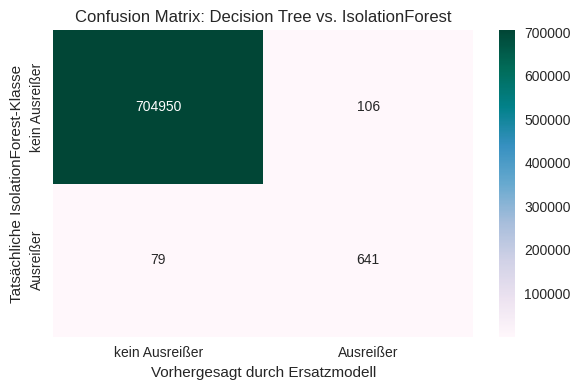

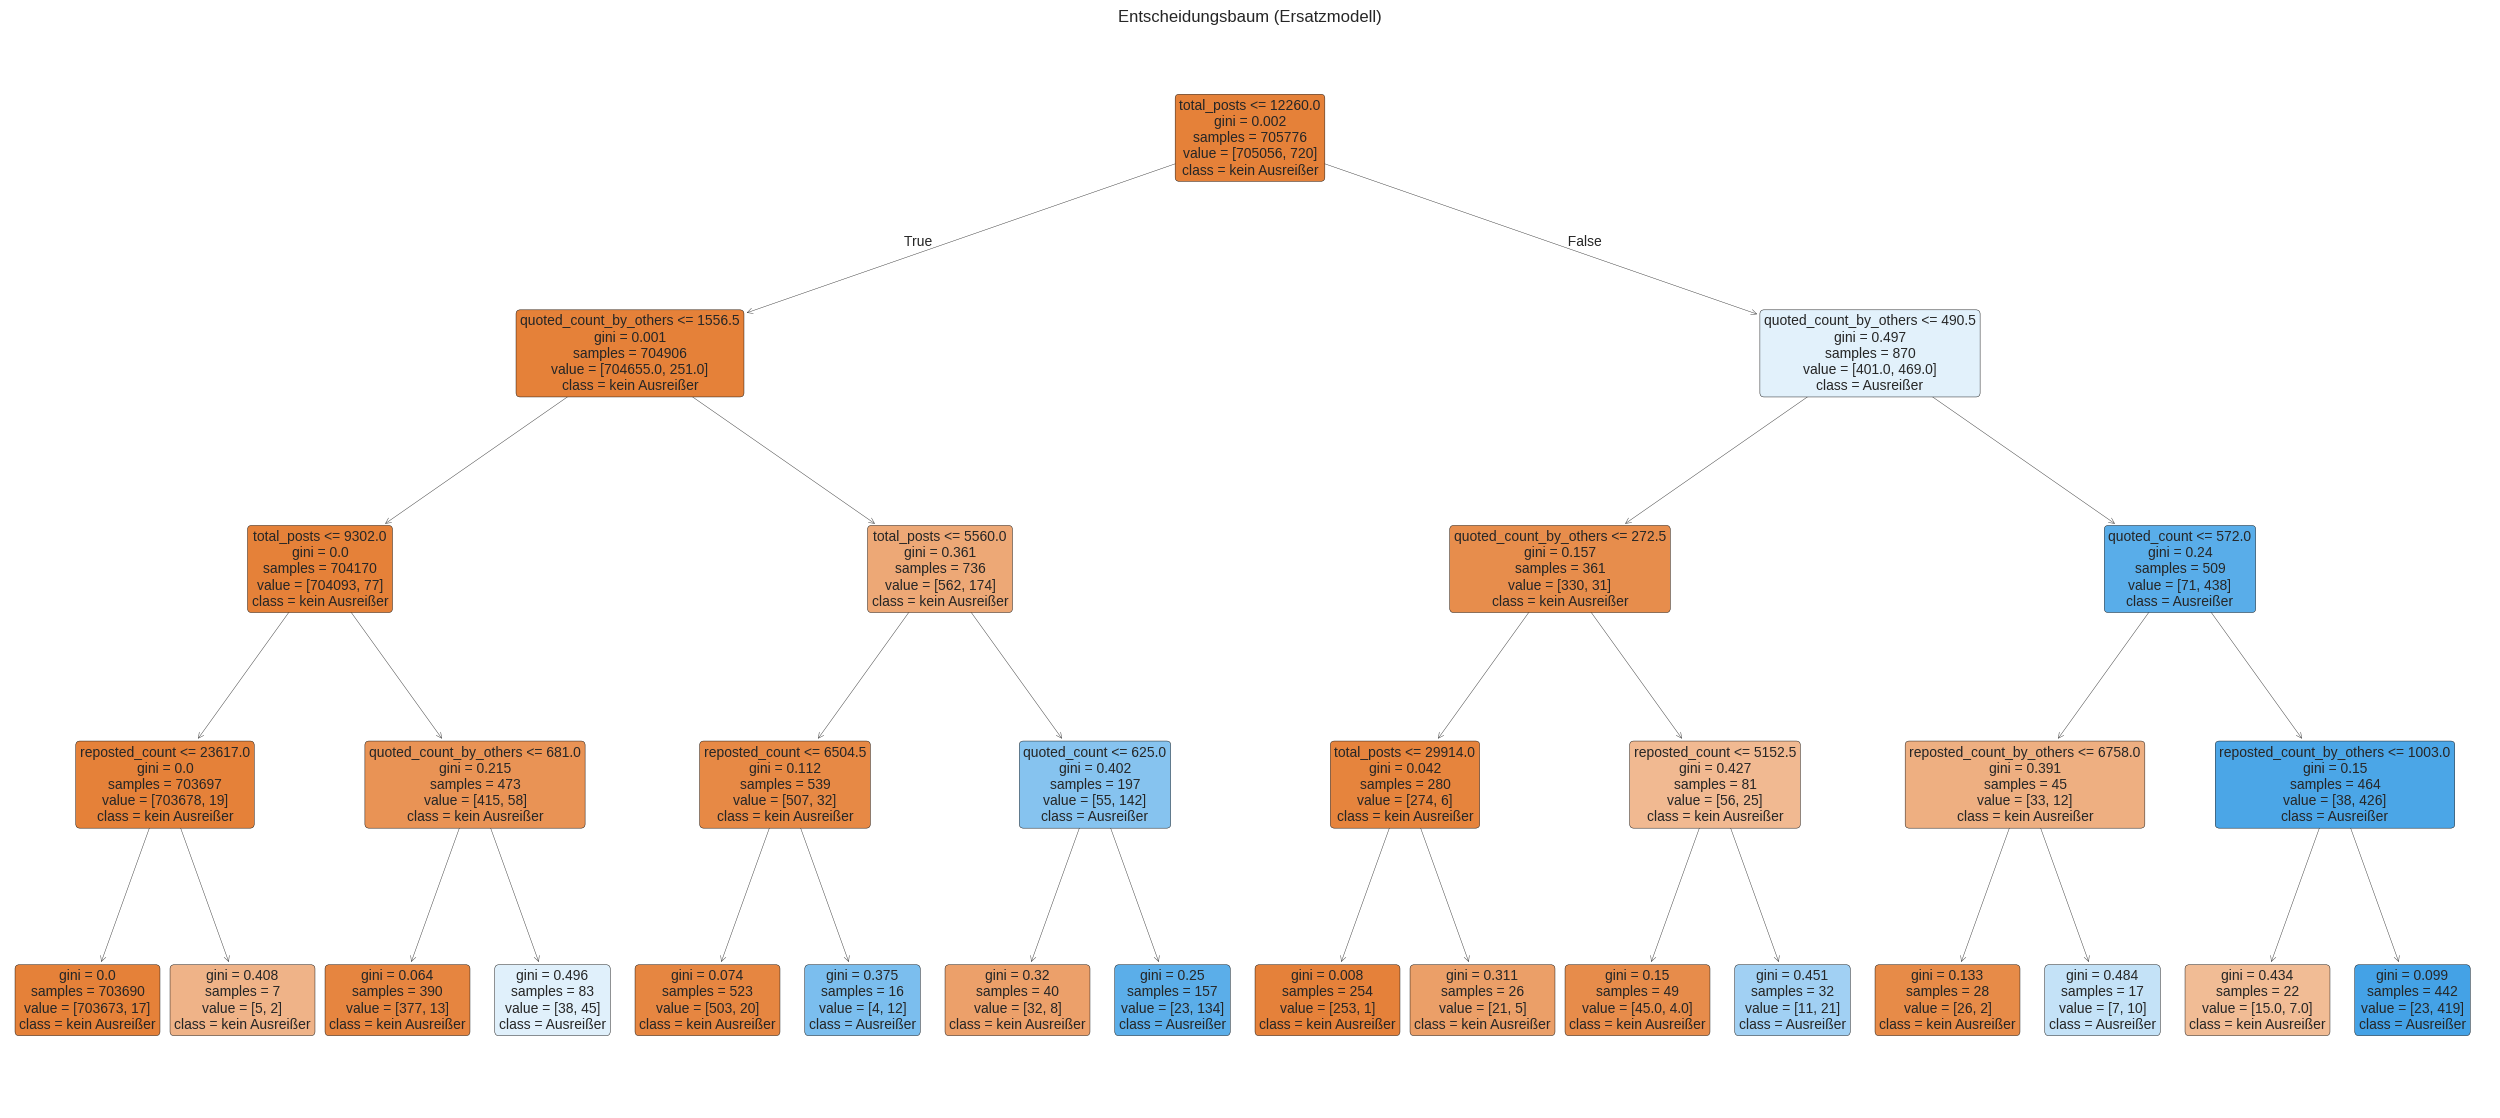

In [37]:
# feature matrix mit gedroppten spalten, damit es gleiche umgebunf wie beim trainieren von isolation forest ist:
feature_matrix = user_features_clean.copy()
feature_matrix = feature_matrix.drop(columns=[col for col in feature_matrix if 'is_bot' in col or 'isolation' in col.lower()],errors='ignore')

target_labels = (iso_preds== -1).astype(int) # vorhersage,1=Ausreißer, 0=kein Ausreißer

#entscheidungsbaum trainieren:
surrogate_model = DecisionTreeClassifier(max_depth=4, random_state=42) # Tiefe für Überschaubarkeit und random state für reproduzierbarkeit gesetzt
surrogate_model.fit(feature_matrix, target_labels)

predicted_labels = surrogate_model.predict(feature_matrix)

conf_matrix = confusion_matrix(target_labels, predicted_labels) # confusion matrix um Genauigkeit zu ueberpruefen

# visualisierung der confusionmatrix (formattierung mit ChatGPT):
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=["kein Ausreißer", "Ausreißer"],
            yticklabels=["kein Ausreißer", "Ausreißer"])
plt.xlabel("Vorhergesagt durch Ersatzmodell")
plt.ylabel("Tatsächliche IsolationForest-Klasse")
plt.title("Confusion Matrix: Decision Tree vs. IsolationForest")
plt.tight_layout()
plt.show()

# Visualisierung des Entscheidungsbaums (Formattierung mit ChatGPT): 
plt.figure(figsize=(32, 14))
plot_tree(surrogate_model,feature_names=feature_matrix.columns,class_names=["kein Ausreißer", "Ausreißer"],filled=True,rounded=True,fontsize=10)
plt.title("Entscheidungsbaum (Ersatzmodell)")
plt.show()

**Interpretation** 
- die **Confusion Matrix** zeigt, dass es 152 false positive (fälschlicherweise als ausreißer markiert) und 93 false negative (fälschlicherweiße als kein ausreißer makiert). DIese werte sind recht gut und das Modell kann daher als accurate angesehen werden
- Laut **Baum** ist das wichtigste Feature zur ENtscheidung über AUsreißer/Nicht-Ausreißer die gesamtzahl der posts (total_posts). Daneben sind noch die Faktoren 'quoted_count_by_others' und 'reposted_count'(_by_others) relevant. Die gini-Werte (oft 0.0 oder sehr niedrig drüber).  Einzelne gini werte sind aber auch etwas höher  ( die in den schwacheren Farben im Baum) und daher weniger hilfreich für die Klassifikation. 

#### Aufgabe 4.1.5. - Anomalie vs. regelbasierte Klassifizierung (3 Punkte)
Bewerten Sie, wie gut diese erkannten Anomalien mit Ihren bestehenden `is_bot`-Labels aus dem regelbasierten Ansatz übereinstimmen.

Erstellen Sie eine Kreuztabelle (im Stil einer Confusionmatrix) mit `pd.crosstab()` und vergleichen Sie diese beiden Klassifizierungen/Labels. Interpretieren Sie die Ergebnisse, indem Sie zwei kurze Beobachtungen niederschreiben, zum Beispiel:
- Wie gut stimmen die beiden Methoden überein?
- Gibt es Bots, die von einer Methode übersehen, von der anderen jedoch erkannt werden?

is_anomaly   -1.0     1.0
is_bot                   
False       48183  656660
True          921      12


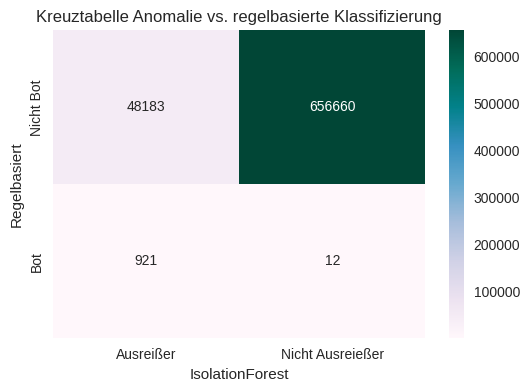

In [55]:
# zeilen anpassen, damit beide die gleiche größe haben:
cleaned_user_df.loc[user_features_clean.index, 'is_anomaly'] = iso_preds

cross_tab = pd.crosstab(cleaned_user_df.loc[user_features_clean.index, 'is_bot'], cleaned_user_df.loc[user_features_clean.index, 'is_anomaly'])
print(cross_tab)

# visualisierung der kreuztabelle als heatmap für bessere anschaulichkeit:
plt.figure(figsize=(6,4))
sns.heatmap(cross_tab, annot=True, cmap='PuBuGn', xticklabels = ["Ausreißer", "Nicht Ausreießer"], fmt='d', yticklabels=["Nicht Bot", "Bot"])
plt.title("Kreuztabelle Anomalie vs. regelbasierte Klassifizierung")
plt.xlabel("IsolationForest")
plt.ylabel("Regelbasiert")
plt.show()

**Interpretation** : 
- der allergrößte Teil sind Nutzer die als Nicht-Bot gekennzeichnet sind und auch vom Isolation forest so eingestuft wurden. genauso wurden auch 231 bots als Ausreißer erkannt. Es scheint also eine ganz gute Übereinstimmung zwischen dem Modell, dass die Anomalien erkenntn und der regelgbasierten Klassifizierung zu geben.
- jedoch gibt es auch Abeichungen: von der regelbaierten Klassifizierung wurden 793 Nutzer als BOt erkannt, aber nicht vom IsolationForest als Ausreißer klassifiziert. Andersrum hat IsolationForest 499 Nutzer vom IsolaitoForest als BOt erkannt obwohl sie laut der regelbaiserten Klassifizierung nicht als Bot gelten. 

#### Aufgabe 4.1.6. - Statistischer Test (2 Punkte)

Testen Sie, ob sich Anomalien und Nicht-Anomalien in `sentiment_mean` und `sentiment_std` ähnlich wie in Aufgabe 3.3 signifikant unterscheiden. Visualisieren Sie die Verteilungen von `sentiment_mean` und `sentiment_std` getrennt für anomale Benutzer und nicht-anomale Benutzer.

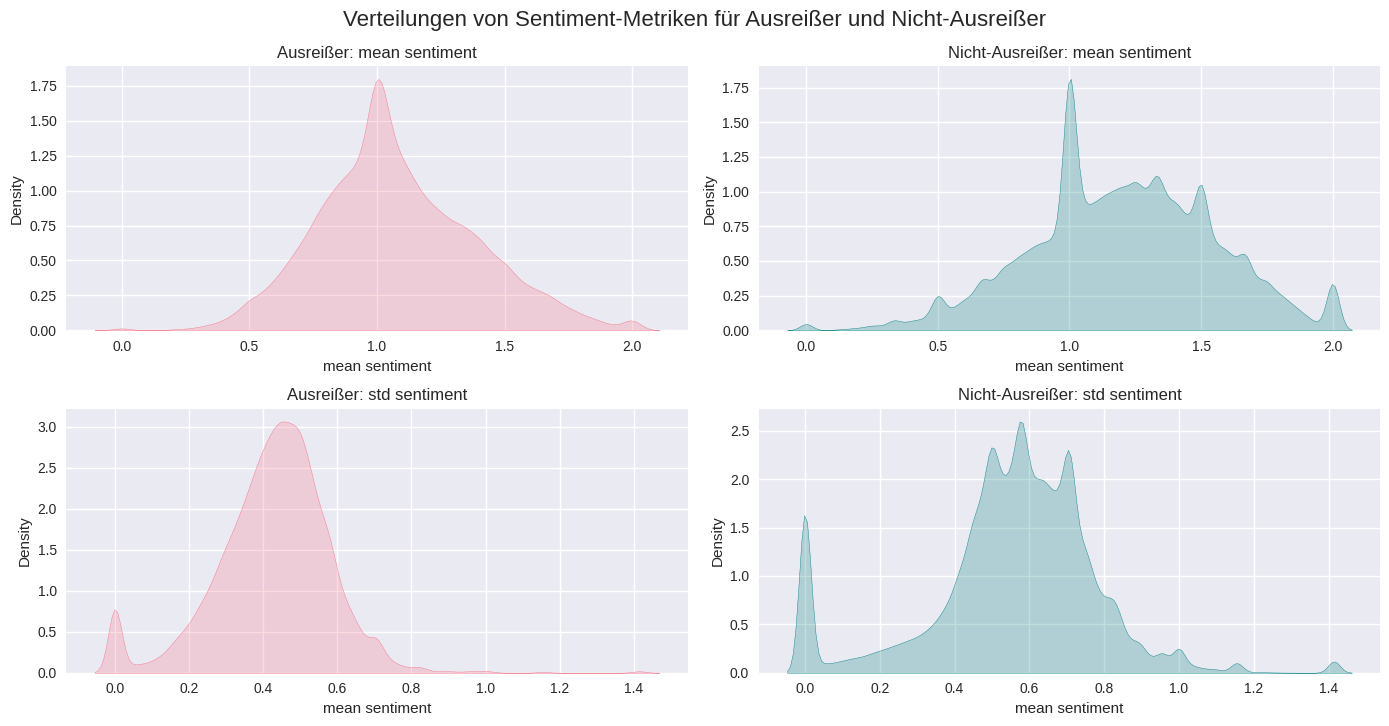

In [56]:
# spalten extrahieren:
anomalous_users = cleaned_user_df[cleaned_user_df["is_anomaly"] == -1]
normal_users = cleaned_user_df[cleaned_user_df["is_anomaly"] == 1]

# einzelne plots verwendet, weil damit man alle verteilungen gut erkennen kann (skalierung war sonst zu unterschiedlich)
fig, axes = plt.subplots(2,2, figsize=(14, 7))

sns.kdeplot(anomalous_users["mean sentiment"], fill=True, ax=axes[0,0]) # kdeplot für eine smoothe verteilung
axes[0,0].set_title("Ausreißer: mean sentiment")
axes[0,0].set_xlabel("mean sentiment")

sns.kdeplot(normal_users["mean sentiment"], fill=True, ax=axes[0,1], color = 'teal')
axes[0,1].set_title("Nicht-Ausreißer: mean sentiment")
axes[0,1].set_xlabel("mean sentiment")

sns.kdeplot(anomalous_users["std_sentiment"], fill=True, ax=axes[1,0])
axes[1,0].set_title("Ausreißer: std sentiment")
axes[1,0].set_xlabel("mean sentiment")

sns.kdeplot(normal_users["std_sentiment"], fill=True, ax=axes[1,1], color = 'teal')
axes[1,1].set_title("Nicht-Ausreißer: std sentiment")
axes[1,1].set_xlabel("mean sentiment")

plt.tight_layout()
plt.suptitle("Verteilungen von Sentiment-Metriken für Ausreißer und Nicht-Ausreißer", fontsize=16, y=1.03) # ChatGPT für besssere Formattierung des Titels verwendet
plt.show()

In [57]:
# MQNN-Whitney-u-Test weil es sich nciht bri allen um eine normalverteiung handelt:

u_mean, p_mean = mannwhitneyu(anomalous_users["mean sentiment"], normal_users["mean sentiment"], alternative='two-sided')
u_std, p_std = mannwhitneyu(anomalous_users["std_sentiment"], normal_users["std_sentiment"], alternative='two-sided')

#formattierte Ausgabe mit ChatGPT:
print(f"Mann-Whitney-Test für mean_sentiment: p = {p_mean:.5f}")
print(f"Mann-Whitney-Test für std_sentiment: p = {p_std:.5f}")


Mann-Whitney-Test für mean_sentiment: p = 0.00000
Mann-Whitney-Test für std_sentiment: p = 0.00000


**Interpretation:** Die Visualisierung zeigt, dass sich die Verteilungen von Ausreißern / Nicht-Ausreißern in ihren sentment-mentriken unterscheiden. 
- das "mean sentiment" ist bei den Ausreißern deutlich neutraler, fast schon normalverteilt um 1, und auch die std ist sehr gering bzw sehr in den niedrigen bereich verschoben.
- bei den Nicht-Ausreißern hingegen ist das mean sentiment etwas mehr ins positibe verschoben udn es gib tmehr schwankungen- das std sentiment ist weiter nach rechts verschoben

- daraus lässt sich abeleiten, dassnicht-ausreißer eine positivere stimmung haben aber auch etwas wechselhafter sind, wohingegen ausreißer einen neutralere un konstatntere stimmung haben.

- der Mann-Whitney-u test bestätigt diese beobachtung, dass sich mean sentiment und std sentiment signifikant unterscheiden zwischen ausreißern udn nicht- ausreißern (p<0.05)

- Der Isolation Forest hat also die sentimen Metriken zur Erkennung von Anomalien genutzt.

### Aufgabe 4.2 – Clustering (25 Punkte)

Das Managementteam von Bluesky möchte tiefere Einblicke in seine Nutzerbasis gewinnen und hat Sie als Datenanalyst um Hilfe gebeten. Das Team ist insbesondere daran interessiert, verschiedene Nutzertypen anhand ihrer Verhaltensmuster zu identifizieren.

Sie haben bereits einen Isolation Forest verwendet, um anomale Nutzer zu erkennen. Nun werden Sie eine umfassende Nutzersegmentierungsanalyse durchführen, indem Sie die folgenden Schritte befolgen.

#### Aufgabe 4.2.1. – Datenaufbereitung (3 Punkte)
Führen Sie den Isolation Forest erneut mit `contamination="auto"` aus, um anomale Benutzer zu identifizieren. Konzentrieren Sie Ihre nachfolgende Analyse auf die Benutzer, die vom Modell **nicht** als Ausreißer identifiziert wurden, da diese typischere Benutzerverhaltensmuster darstellen.

- Wenden Sie den Isolation Forest mit `contamination="auto"` an. 
- Geben Sie an, wie viele Benutzer als anomal und wie viele als normal klassifiziert wurden.
- Erstellen Sie eine Teilmenge, die nur die normalen (nicht anomalen) Benutzer für das Clustering enthält.

In [58]:
# feature matrix wie vorher anpassen:
feature_matrix_clustering = user_features_clean.copy()
feature_matrix_clustering = feature_matrix_clustering.drop(columns=[col for col in feature_matrix if 'is_bot' in col or 'isolation' in col.lower()],errors='ignore')

# isolationforest mir auto contamination:
iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_preds = iso_forest.fit_predict(feature_matrix_clustering)

# zusammenzaehlen wie viele benutzer anomal/normal sind um es anzugeben:
n_anomalies = np.sum(iso_preds == -1)
n_normals = np.sum(iso_preds == 1)
print("Es wurden ", n_anomalies, " Benutzer als anomal klassifiziert.")
print("Es wurden ", n_normals, " Benutzer als normal klassifiziert.")

# teilmenge mir nur normlen Benutzern für das clustering erstellen:
normal_users_df =  user_features_clean[iso_preds == 1]
normal_users_df.shape

Es wurden  49104  Benutzer als anomal klassifiziert.
Es wurden  656672  Benutzer als normal klassifiziert.


(656672, 13)

#### Aufgabe 4.2.2. – Feature Engineering (5 Punkte)
Erstellen Sie eine Teilmenge von Features für das Clustering, die Verhaltensmuster der Benutzer erfassen:

- Berechnen Sie `total_interactions` als Summe aus `replied_count`, `reposted_count` und `quoted_count`
- Erstellen Sie Features für die Interaktionsrate:
    - `reply_ratio` = replied_count / total_interactions (Behandlung der Division durch Null)
    - `repost_ratio` = reposted_count / total_interactions
    - `quote_ratio` = quoted_count / total_interactions
- Wenden Sie eine Log-Transformation auf die Interaktionszahlen an (fügen Sie vor der Log-Transformation 1 hinzu, um Nullen zu behandeln)
- Erläutern Sie, warum diese Transformationen für das Clustering und das Verständnis der Nutzer nützlich sind

In [59]:
normal_users_df["total_interactions"] = (normal_users_df["replied_count"] + normal_users_df["reposted_count"] + normal_users_df["quoted_count"])

# um nicht durch 0 zu teilen: np.where benutzen 
normal_users_df["reply_ratio"] = np.where(normal_users_df["total_interactions"] > 0, normal_users_df["replied_count"] / normal_users_df["total_interactions"], 0)
normal_users_df["repost_ratio"] = np.where(normal_users_df["total_interactions"] > 0, normal_users_df["reposted_count"] / normal_users_df["total_interactions"], 0)
normal_users_df["quote_ratio"] = np.where(normal_users_df["total_interactions"] > 0, normal_users_df["replied_count"] / normal_users_df["total_interactions"], 0)

# log transoformation mit +1 um Nullen zu behandeln (kompaktere schriebweise in schleife mit chaatgpt)
for col in ["replied_count", "reposted_count", "quoted_count", "total_interactions"]:
    normal_users_df[f"log_{col}"] = np.log1p(normal_users_df[col])  # log(1 + x)

**Erläuterung, warum diese Transformationen für das Clustering und das Verständnis der Nutzer nützlich sind:**
- mit total_interactions kann man die aktivität eine sienzelnen nutzers gut mit der von anderen vergleichen und sehr aktive von weniger aktiven unterscheiden
- mit features kann man di eeinzelnen verhaltensmuser aufdecken und erkennen ob ein benutzer zum vbeiuspien vor allem reposted statt eigene posts zu schreiben
- Die Log-Transformation ist wichrtig, damit man die daten später bersser interpetieren kann und das nutzerverhalten dadurch besser verstehen kann, sonst würden extreme werte das clustering dominiern

#### Aufgabe 4.2.3. – Optimale Clusterauswahl (8 Punkte)
Bestimmen Sie die optimale Anzahl von Clustern mithilfe der Silhouette-Methode. Die Silhouette-Methode bewertet die Clustering-Qualität, um die optimale Anzahl von Clustern k zu ermitteln. Sie sorgt für ein Gleichgewicht zwischen der Kohäsion innerhalb der Cluster und der Trennung zwischen den Clustern. Pro k wird ein Silhouette-Wert berechnet. Ein Wert nahe 1 bedeutet gut voneinander getrennte Cluster, ein Wert nahe 0 bedeutet überlappende Cluster und ein negativer Wert bedeutet falsch klassifizierte Cluster.

- Nehmen Sie die Features `log_replied`, `log_reposted`, `log_quoted`, `reply_ratio`, `repost_ratio`, `quote_ratio`
- Führen Sie einen `StandardScaler` auf diese Merkmale aus
- Testen Sie k-Means-Clustering für k = 2 bis 8
- Berechnen Sie die Silhouette-Werte für jedes k
- Zeichnen Sie die Silhouette-Werte und die Inertia-Werte auf und wählen Sie das optimale k aus
- Begründen Sie Ihre Wahl der optimalen Anzahl von Clustern

k=  2 /8
k=  3 /8
k=  4 /8
k=  5 /8
k=  6 /8
k=  7 /8
k=  8 /8


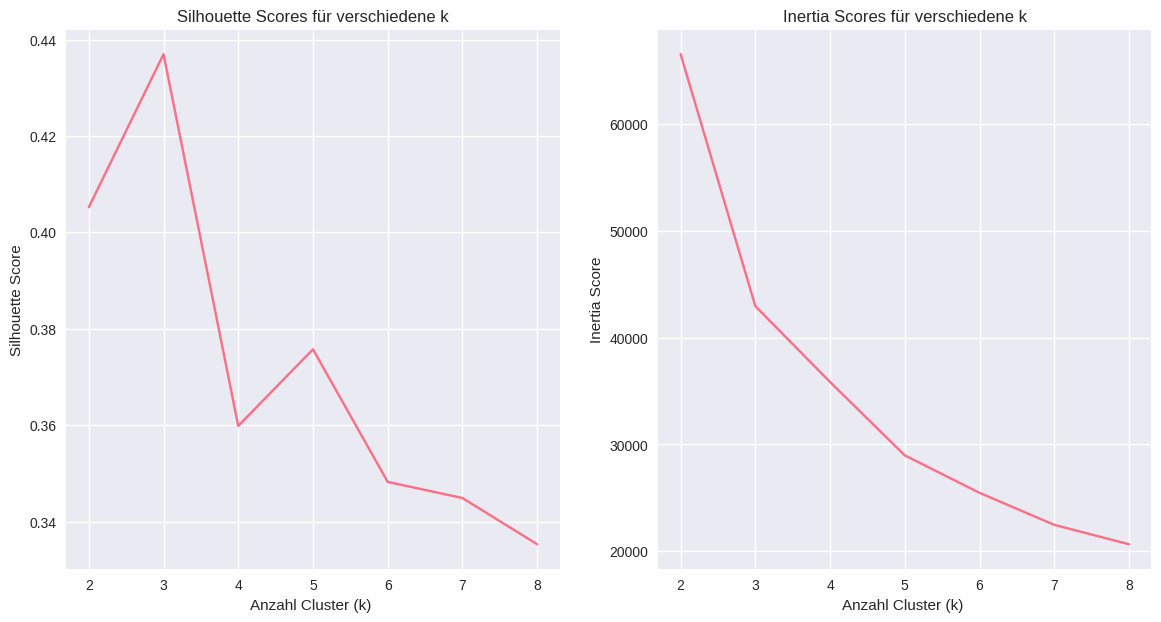

In [68]:
cluster_features = ["log_replied_count", "log_reposted_count", "log_quoted_count", "reply_ratio", "repost_ratio", "quote_ratio"]
X = normal_users_df[cluster_features]
scaler = StandardScaler()

#mit chatgpt schnell eine verschenllerung des codes gemacht damit cih den fehler noch rausbekomme: und es testen kann
X_sampled = X.sample(n=20000, random_state=42)
X_scaled = scaler.fit_transform(X_sampled)

silhouette_scores = []
inertia_scores = []
k_range = range(2,9) # zweiter wert ist exklusiv, es geht also bis 8

for k in k_range:
    print("k= ", k, "/8") # um den fortschritt beim durchlaufen zu sehen
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter = 100, n_init = 1) # noch kurz vorher in 1 geändert damit es schneller läuft vielleicht aber konnte es nciht testen weil es trotzdem zu lange gedauert hat
    labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette)
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)

# silhouetten wert und interia werte aufzeichen, um das optimale k zu finden 
fig, ax = plt.subplots(1,2, figsize = (14,7))

ax[0].plot(k_range, silhouette_scores)
ax[0].set_title("Silhouette Scores für verschiedene k")
ax[0].set_xlabel("Anzahl Cluster (k) ")
ax[0].set_ylabel("Silhouette Score")

ax[1].plot(k_range, inertia_scores)
ax[1].set_title("Inertia Scores für verschiedene k")
ax[1].set_xlabel("Anzahl Cluster (k) ")
ax[1].set_ylabel("Inertia Score")

plt.show()

**Auswahl vom optimalen k** Ich wähle k=3, weil 
- bei k= 3 ist der höchste silhouette score
bei k=3 hat der inertia score einen starken knick, ein 'elbow muster' das den optimalen wert anzeigt (Quelle für intepretation: https://medium.com/@jeffzyme/understanding-inertia-distortion-and-silhouette-scores-and-their-differences-key-metrics-for-458fe28ce2aa)

In [69]:
optimal_k = 3

#### Aufgabe 4.2.4. – Clustering und Visualisierung (5 Punkte)
Wenden Sie k-Means-Clustering mit Ihrem optimalen k an und erstellen Sie mindestens zwei verschiedene Visualisierungen Ihrer Cluster:
- PCA-Projektion (2D-Streudiagramm, nach Clustern farblich gekennzeichnet)
- Eine weitere Visualisierung Ihrer Wahl (t-SNE, UMAP oder Cluster-Charakteristik-Diagramme)

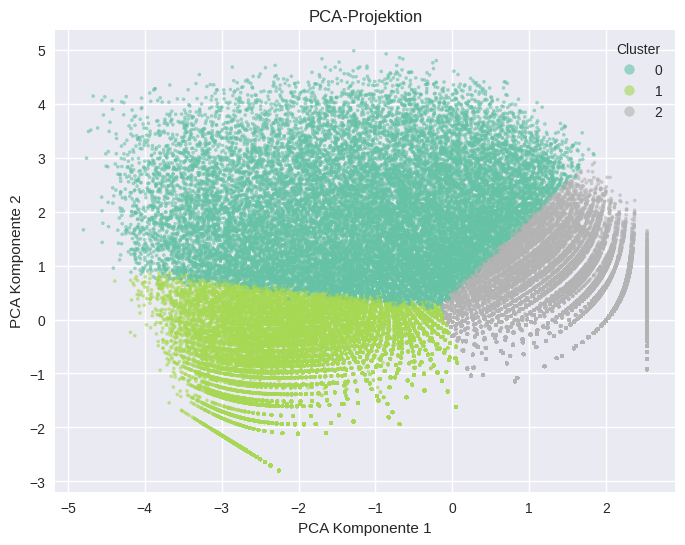

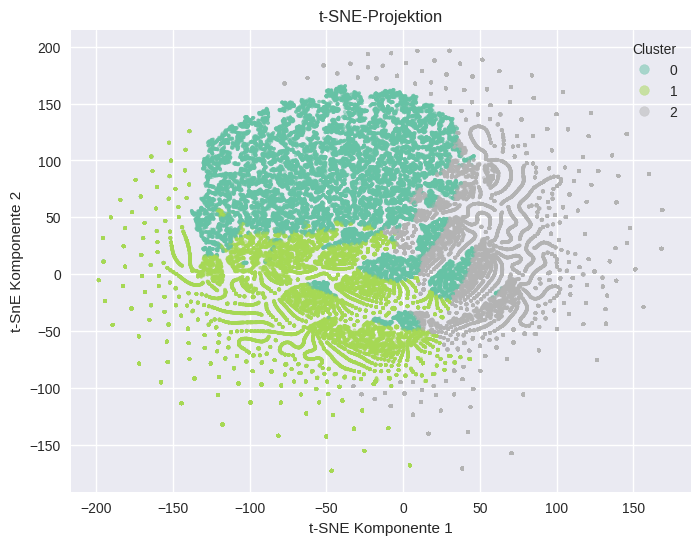

In [70]:
# datenvorbereitung, damit alle die gleiche shape fpr die analyse haben
if X.shape[0] > 100000:
    sampled_indices = X.sample(n=100000, random_state = 42).index
    X = X.loc[sampled_indices]
    sampled_df = normal_users_df.loc[sampled_indices].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# richtige labels zu richtigem daraframe hinzufügen:
sampled_df["cluster"] = cluster_labels

#PCA
pca = PCA(n_components=2) # dimension auf 2 reduzieren um es in 2d anzuzeigen
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='Set2', s=5, alpha=0.6)
plt.title("PCA-Projektion")
plt.xlabel("PCA Komponente 1")
plt.ylabel("PCA Komponente 2")
plt.legend(*scatter.legend_elements(), title="Cluster") # legende mit chatgpt
plt.show()

#t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize = (8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=cluster_labels, cmap='Set2', s=5, alpha=0.5)
plt.title("t-SNE-Projektion")
plt.xlabel("t-SNE Komponente 1")
plt.ylabel("t-SnE Komponente 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

t_SNE wurde genutzt, weil es besonder gut für die Visualisierung von hochsimenasionale nDaten geeinet ist. Im Gegensatz zu PCA können hier auch nicht- Lineare Strukturen entstehen und Gruppierungen abgebildet werden. Es könen also noch detailliertere Clusterstrukturen dartgestellt werden 

#### Aufgabe 4.2.5. – Cluster-Interpretation (4 Punkte)
Analysieren und interpretieren Sie Ihre Cluster, um umsetzbare Erkenntnisse zu gewinnen:

- Berechnen Sie die Mittelwerte der wichtigsten Merkmale für jeden Cluster und stellen Sie diese grafisch dar.
- Stellen Sie die Anteile der Nutzer, die zu jedem Cluster gehören, grafisch dar.
- Beschreiben Sie, was jeden Cluster charakterisiert (z. B. hohe/geringe Aktivität, Verhaltenspräferenzen).
- Geben Sie jedem Cluster einen aussagekräftigen Namen, der dessen Verhaltensmuster widerspiegelt

In [ ]:
print(sampled_df.columns.tolist())

In [ ]:
cluster_means = sampled_df.groupby("cluster")[cluster_features].mean() # mittelwerte für die wichtigsten features

# heatmap als darstellung, weil man da direkt erkenn, wie hoch die anteile sind:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_means.T, annot=True, cmap="YlGnBu")
plt.title("Mittelwerte der Merkmale für die Cluster")
plt.xlabel("CLuster")
plt.ylabel("Merkmal")
plt.show()

In [ ]:
# Clusterverteilung für die darstellung vorher bestimmen
cluster_counts = sampled_df["cluster"].value_counts().sort_index()
cluster_percent = cluster_counts / len(sampled_df) * 100

# anteile die zu jedem nutzer gehörn mit balkendiagramm darstellen, weil es einfachund übersichtilich ist
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_percent.index, y=cluster_percent.values, palette="Set2")
plt.title("Nutzeranteile je cluster")
plt.xlabel("Cluster")
plt.ylabel("Anteil (%)")
plt.show()

**Cluster_Interpretation** 
- *cluster0* zitiert kaum, schreibt selten antworten, reposted im verleich zu den anderen am meisten, der reposted count ist auch hoch aber reply und quoted recht gering. Man könnte ihn als "Teiler" klassifizieren, weil er da im vergleich zu den anderen heraussticht aber generell nicht so aktiv ist
- *cluster1* antwortet im vergleich zu den anderen am meisten, aber rtepostet und zitiert kaum. er ist diskutiert vielleicht und ist aktiv bei beiträgen anderer nutert aber teilt und ziitiert sie nicht wirklich. "Diskutierer" oder "Antworter" könnte man ihn viellciht nenne
- *Cluster2* hat die höchste qupte_ration(wenn auch immernoch gering), den höchsten repost_count, qupted_count und replied_count bei alle log werten. Er ist insgesamt am aktibsten also könnte man ihn als "Creator" klassifizieren

**DISCLAIMER** ich wollte kurz vor dem abgabetermin noch etwas schöner machen udn habe daher mehr daten genommen bei k means aber das dauert jetzt so lange dass es wahrscheinlich nicht mehr durchläuft  bis ich es abgeben muss, ich hoffe ich hab nicht uas versehen noch irhgenwo was geändert (leider mache ich schnell typos duerch die eventuell de  code danach ncith mehr so läuft) aber eigentlich hat alles was danach kommt funktioniert... (ich hab leider keine sicherheitskopie von davor gemacht die ich hochladen kann) 